In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data loading**

Load the dataset.


In [ ]:
#1) Load data
df = pd.read_csv('/content/lung_disease_v1.csv')

# Task 1 – Exploratory Data Analysis dans les règles de l’art ML

In [ ]:
# Dataset Overview
df.head()

patient_id  age     sex   bmi smoking_status  pack_years  pm25_exposure  \
0           1   49    Male  20.1          Never        21.0           20.8   
1           2   61  Female  28.4        Current        34.1           10.8   
2           3   70    Male  22.2        Current        15.7           12.0   
3           4   47    Male  23.1        Current        49.0           20.0   
4           5   70  Female  29.0         Former         6.0            6.0   

      occupation family_history  cough  ...  dlco_pct_pred    cxr_finding  \
0         Office            NaN      1  ...           82.1         Normal   
1         Office            NaN      0  ...           81.1         Normal   
2  Manufacturing            NaN      1  ...           85.4  Consolidation   
3  Manufacturing            NaN      0  ...           49.0         Normal   
4         Office            NaN      0  ...           81.6         Normal   

   ct_nodule_size_mm  ct_emphysema_pct  sixmwd_m  hypertension  diabetes  \
0                3.0              11.9       447             1         1   
1                5.9               2.1       394             0         0   
2                2.8               4.8       309             0         1   
3                1.8              29.4       190             0         0   
4                1.0               9.5       314             0         0   

   hospital_visits_last_year  disease_type   severity  
0                          0        Asthma   Moderate  
1                          0   Lung Cancer  Mild/None  
2                          0     Pneumonia  Mild/None  
3                          0          COPD   Moderate  
4                          0       Healthy  Mild/None  

[5 rows x 33 columns]

For The patient ID- It is simply a unique identifier of a patient and it is not useful in any way. Family history- the initial records of the dataset indicate NaN of this variable. In the original Excel file, the NaNs actually represent “none” meaning there is no history of disease that is recorded in the family of the patient. And for Severity will not be considered in the input of the models because it is an aspect determined following a diagnosis.

`The decision is to drop columns "patient_id' and 'severity`’




In [ ]:
#Drop colimns patient id and severity

df = df.drop(columns=['patient_id', 'severity'])
df



age     sex   bmi smoking_status  pack_years  pm25_exposure  \
0       49    Male  20.1          Never        21.0           20.8   
1       61  Female  28.4        Current        34.1           10.8   
2       70    Male  22.2        Current        15.7           12.0   
3       47    Male  23.1        Current        49.0           20.0   
4       70  Female  29.0         Former         6.0            6.0   
...    ...     ...   ...            ...         ...            ...   
11995   55    Male  27.5         Former         7.7           15.6   
11996   62    Male  19.6        Current        56.6           15.8   
11997   53    Male  19.3          Never        16.7            4.9   
11998   39  Female  24.8        Current        60.2            8.6   
11999   76    Male  31.1          Never        17.9           20.1   

          occupation family_history  cough  dyspnea  ...  fvc_pct_pred  \
0             Office            NaN      1        0  ...          85.9   
1             Office            NaN      0        1  ...         103.3   
2      Manufacturing            NaN      1        1  ...          87.4   
3      Manufacturing            NaN      0        1  ...         100.5   
4             Office            NaN      0        0  ...         114.1   
...              ...            ...    ...      ...  ...           ...   
11995  Manufacturing           COPD      0        0  ...          83.9   
11996         Mining            NaN      0        0  ...         117.5   
11997         Office            NaN      1        0  ...         108.8   
11998     Healthcare         Asthma      1        1  ...         104.9   
11999     Healthcare            NaN      0        0  ...         103.0   

       dlco_pct_pred    cxr_finding  ct_nodule_size_mm  ct_emphysema_pct  \
0               82.1         Normal                3.0              11.9   
1               81.1         Normal                5.9               2.1   
2               85.4  Consolidation                2.8               4.8   
3               49.0         Normal                1.8              29.4   
4               81.6         Normal                1.0               9.5   
...              ...            ...                ...               ...   
11995           85.4     Infiltrate                0.0               0.0   
11996           83.5    Mass/Nodule                4.9               6.7   
11997           87.9         Normal                3.6               0.0   
11998          121.2    Mass/Nodule               26.3              13.4   
11999           85.9         Normal                0.0               4.7   

       sixmwd_m  hypertension  diabetes  hospital_visits_last_year  \
0           447             1         1                          0   
1           394             0         0                          0   
2           309             0         1                          0   
3           190             0         0                          0   
4           314             0         0                          0   
...         ...           ...       ...                        ...   
11995       541             0         1                          1   
11996       307             0         0                          1   
11997       376             0         0                          1   
11998       567             0         0                          1   
11999       603             0         0                          0   

       disease_type  
0            Asthma  
1       Lung Cancer  
2         Pneumonia  
3              COPD  
4           Healthy  
...             ...  
11995       Healthy  
11996   Lung Cancer  
11997       Healthy  
11998   Lung Cancer  
11999       Healthy  

[12000 rows x 31 columns]

In [ ]:
# number of observations and features
print(df.shape)

(12000, 31)


**12,000** observations

**33** variables

# Target Variable Analysis

The preliminary analysis of the data shows that there are many variables that are related to clinical measurements obtained through questionnaires or documentation and these variables are used to define the features of the state of the patient,.  
In the dataset, the variable disease type is a unique variable that includes the final diagnosis of the patient which synthesizes all the clinical observations.


disease_type
Healthy        35.358333
COPD           17.891667
Asthma         16.400000
Pneumonia      15.508333
Lung Cancer    14.841667
Name: proportion, dtype: float64


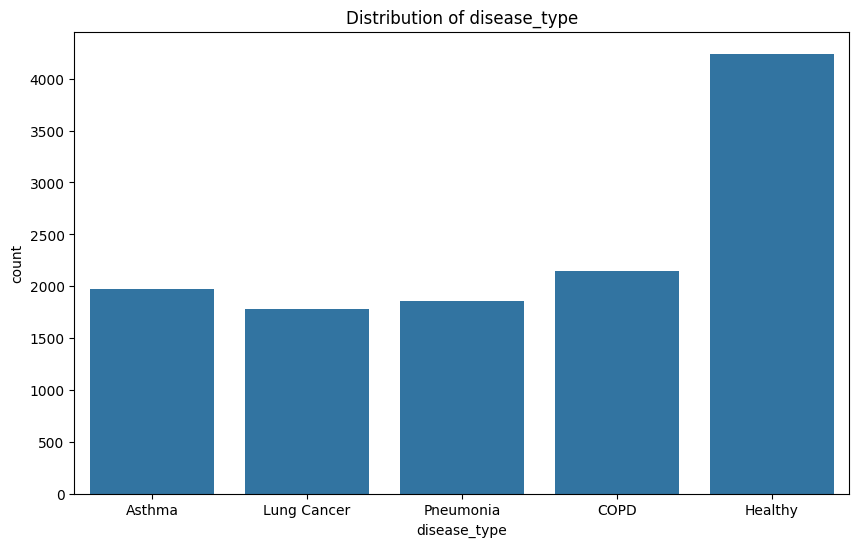

In [ ]:
# Target Variable Analysis
print(df['disease_type'].value_counts(normalize=True) * 100)
plt.figure(figsize=(10, 6))
sns.countplot(x='disease_type', data=df)
plt.title('Distribution of disease_type')
plt.show()

The graph shows five categories of lung diseases:

* Healthy → most represented class

* COPD

* Asthma

* Pneumonia

* Lung Cancer

**The distribution is not perfectly balanced, with a clear dominance of the Healthy class.**

# Data Types

In [ ]:
# Data Types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        12000 non-null  int64  
 1   sex                        12000 non-null  object 
 2   bmi                        12000 non-null  float64
 3   smoking_status             12000 non-null  object 
 4   pack_years                 12000 non-null  float64
 5   pm25_exposure              12000 non-null  float64
 6   occupation                 12000 non-null  object 
 7   family_history             4824 non-null   object 
 8   cough                      12000 non-null  int64  
 9   dyspnea                    12000 non-null  int64  
 10  wheeze                     12000 non-null  int64  
 11  chest_pain                 12000 non-null  int64  
 12  fever                      12000 non-null  int64  
 13  hemoptysis                 12000 non-null  int

**Number of Entries** : The dataset consists of 12,000 observations.

**Number of Columns** : There are 31 variables in total.

**Data Types**
*   14 variables are of type float
*   11 variables are of type int64
*   6 variables are of type object

**Missing Values** : Most variables contain no missing values.

*  The family_history variable contains 4,824 non-null values

**Binary variables stored as numerical (int64)** : The following variables are encoded as integers but represent binary clinical symptoms or conditions (0 = absence, 1 = presence):

*  cough,dyspnea,wheeze,chest_pain,fever,hemoptysis,hypertension,diabetes


**Categorical Variables** :

Categorical variables stored as object : sex,smoking_status,occupation,family_history,cxr_finding,hospital_visits_last_year,disease_type

**Numerical Variables**
age, bmi, pack_years, pm25_exposure,weight_loss_kg, spo2, respiratory_rate, crp_mg_L, wbc_10e9_L,fev1_fvc, fev1_pct_pred, fvc_pct_pred, dlco_pct_pred,ct_nodule_size_mm, ct_emphysema_pct, sixmwd_m

In [ ]:
numerical_features = [
    "age","bmi","pack_years","pm25_exposure",
    "weight_loss_kg","spo2","respiratory_rate","crp_mg_L","wbc_10e9_L",
    "fev1_fvc","fev1_pct_pred","fvc_pct_pred","dlco_pct_pred",
    "ct_nodule_size_mm","ct_emphysema_pct",
    "sixmwd_m"
]

categorical_features = [
    "sex", "smoking_status", "occupation",
    "family_history", "cxr_finding",
    "cough", "dyspnea", "wheeze", "chest_pain",
    "fever", "hemoptysis",
    "hypertension", "diabetes","hospital_visits_last_year"
]

# Convert the identified features to object data type
df[categorical_features] = df[categorical_features].astype('object')

df.dtypes


age                            int64
sex                           object
bmi                          float64
smoking_status                object
pack_years                   float64
pm25_exposure                float64
occupation                    object
family_history                object
cough                         object
dyspnea                       object
wheeze                        object
chest_pain                    object
fever                         object
hemoptysis                    object
weight_loss_kg               float64
spo2                         float64
respiratory_rate             float64
crp_mg_L                     float64
wbc_10e9_L                   float64
fev1_fvc                     float64
fev1_pct_pred                float64
fvc_pct_pred                 float64
dlco_pct_pred                float64
cxr_finding                   object
ct_nodule_size_mm            float64
ct_emphysema_pct             float64
sixmwd_m                       int64
hypertension                  object
diabetes                      object
hospital_visits_last_year     object
disease_type                  object
dtype: object

In [ ]:
# check duplicated rows
df[df.duplicated()]


Empty DataFrame
Columns: [age, sex, bmi, smoking_status, pack_years, pm25_exposure, occupation, family_history, cough, dyspnea, wheeze, chest_pain, fever, hemoptysis, weight_loss_kg, spo2, respiratory_rate, crp_mg_L, wbc_10e9_L, fev1_fvc, fev1_pct_pred, fvc_pct_pred, dlco_pct_pred, cxr_finding, ct_nodule_size_mm, ct_emphysema_pct, sixmwd_m, hypertension, diabetes, hospital_visits_last_year, disease_type]
Index: []

[0 rows x 31 columns]

In [ ]:
# Missing Values
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

age                             0
sex                             0
bmi                             0
smoking_status                  0
pack_years                      0
pm25_exposure                   0
occupation                      0
family_history               7176
cough                           0
dyspnea                         0
wheeze                          0
chest_pain                      0
fever                           0
hemoptysis                      0
weight_loss_kg                  0
spo2                            0
respiratory_rate                0
crp_mg_L                        0
wbc_10e9_L                      0
fev1_fvc                        0
fev1_pct_pred                   0
fvc_pct_pred                    0
dlco_pct_pred                   0
cxr_finding                     0
ct_nodule_size_mm               0
ct_emphysema_pct                0
sixmwd_m                        0
hypertension                    0
diabetes                        0
hospital_visit

Only one variable contains missing values: **family_history**



*   7,176 missing values
*   ≈ 59.8% of the dataset






# Descriptive Statistics

In [ ]:
# Get the summary statistics for numerical variables
df.describe().T

count        mean         std    min     25%     50%  \
age                12000.0   58.070833   14.741634  18.00   48.00   58.00   
bmi                12000.0   27.008608    4.961936  16.00   23.50   27.00   
pack_years         12000.0   14.767758   14.848183   0.00    2.70   10.30   
pm25_exposure      12000.0   15.114308    6.689190   3.00   10.30   15.00   
weight_loss_kg     12000.0    1.624208    2.422476  -5.00    0.00    1.40   
spo2               12000.0   95.962800    2.376014  87.20   94.40   96.00   
respiratory_rate   12000.0   17.974033    2.993347  10.00   15.90   18.00   
crp_mg_L           12000.0   20.793150   30.606319   0.00    1.50   10.30   
wbc_10e9_L         12000.0    8.096900    2.606807   2.00    6.30    7.80   
fev1_fvc           12000.0    0.740610    0.100471   0.32    0.68    0.75   
fev1_pct_pred      12000.0   83.805633   18.773718  20.00   72.20   85.10   
fvc_pct_pred       12000.0   94.915475   12.051371  49.60   86.80   94.90   
dlco_pct_pred      12000.0   81.511558   17.630906  20.00   70.80   82.40   
ct_nodule_size_mm  12000.0    4.644267    5.926454   0.00    1.00    3.00   
ct_emphysema_pct   12000.0    8.275508    8.290305   0.00    2.50    6.30   
sixmwd_m           12000.0  403.809167  109.520138 -29.00  329.00  405.00   

                      75%     max  
age                 68.00   90.00  
bmi                 30.40   45.60  
pack_years          22.80   81.80  
pm25_exposure       19.70   41.30  
weight_loss_kg       3.00   13.30  
spo2                97.70  100.00  
respiratory_rate    20.00   28.70  
crp_mg_L            22.90  218.60  
wbc_10e9_L           9.50   20.70  
fev1_fvc             0.81    0.95  
fev1_pct_pred       96.50  140.00  
fvc_pct_pred       103.10  140.00  
dlco_pct_pred       93.50  139.50  
ct_nodule_size_mm    5.40   47.80  
ct_emphysema_pct    10.90   51.60  
sixmwd_m           478.00  816.00

In [ ]:
# Get the summary statistics for categorical variables
df.describe(include='object')

sex smoking_status occupation family_history  cough  dyspnea  \
count   12000          12000      12000           4824  12000    12000   
unique      2              3          7              3      2        2   
top      Male          Never     Office           COPD      0        0   
freq     6291           4988       3568           1845   6992     7233   

        wheeze  chest_pain  fever  hemoptysis cxr_finding  hypertension  \
count    12000       12000  12000       12000       12000         12000   
unique       2           2      2           2           8             2   
top          0           0      0           0      Normal             0   
freq      9039       10343   9996       11663        6629          7832   

        diabetes  hospital_visits_last_year disease_type  
count      12000                      12000        12000  
unique         2                          6            5  
top            0                          0      Healthy  
freq        9789                       6194         4243

# **Distribution and skewness**

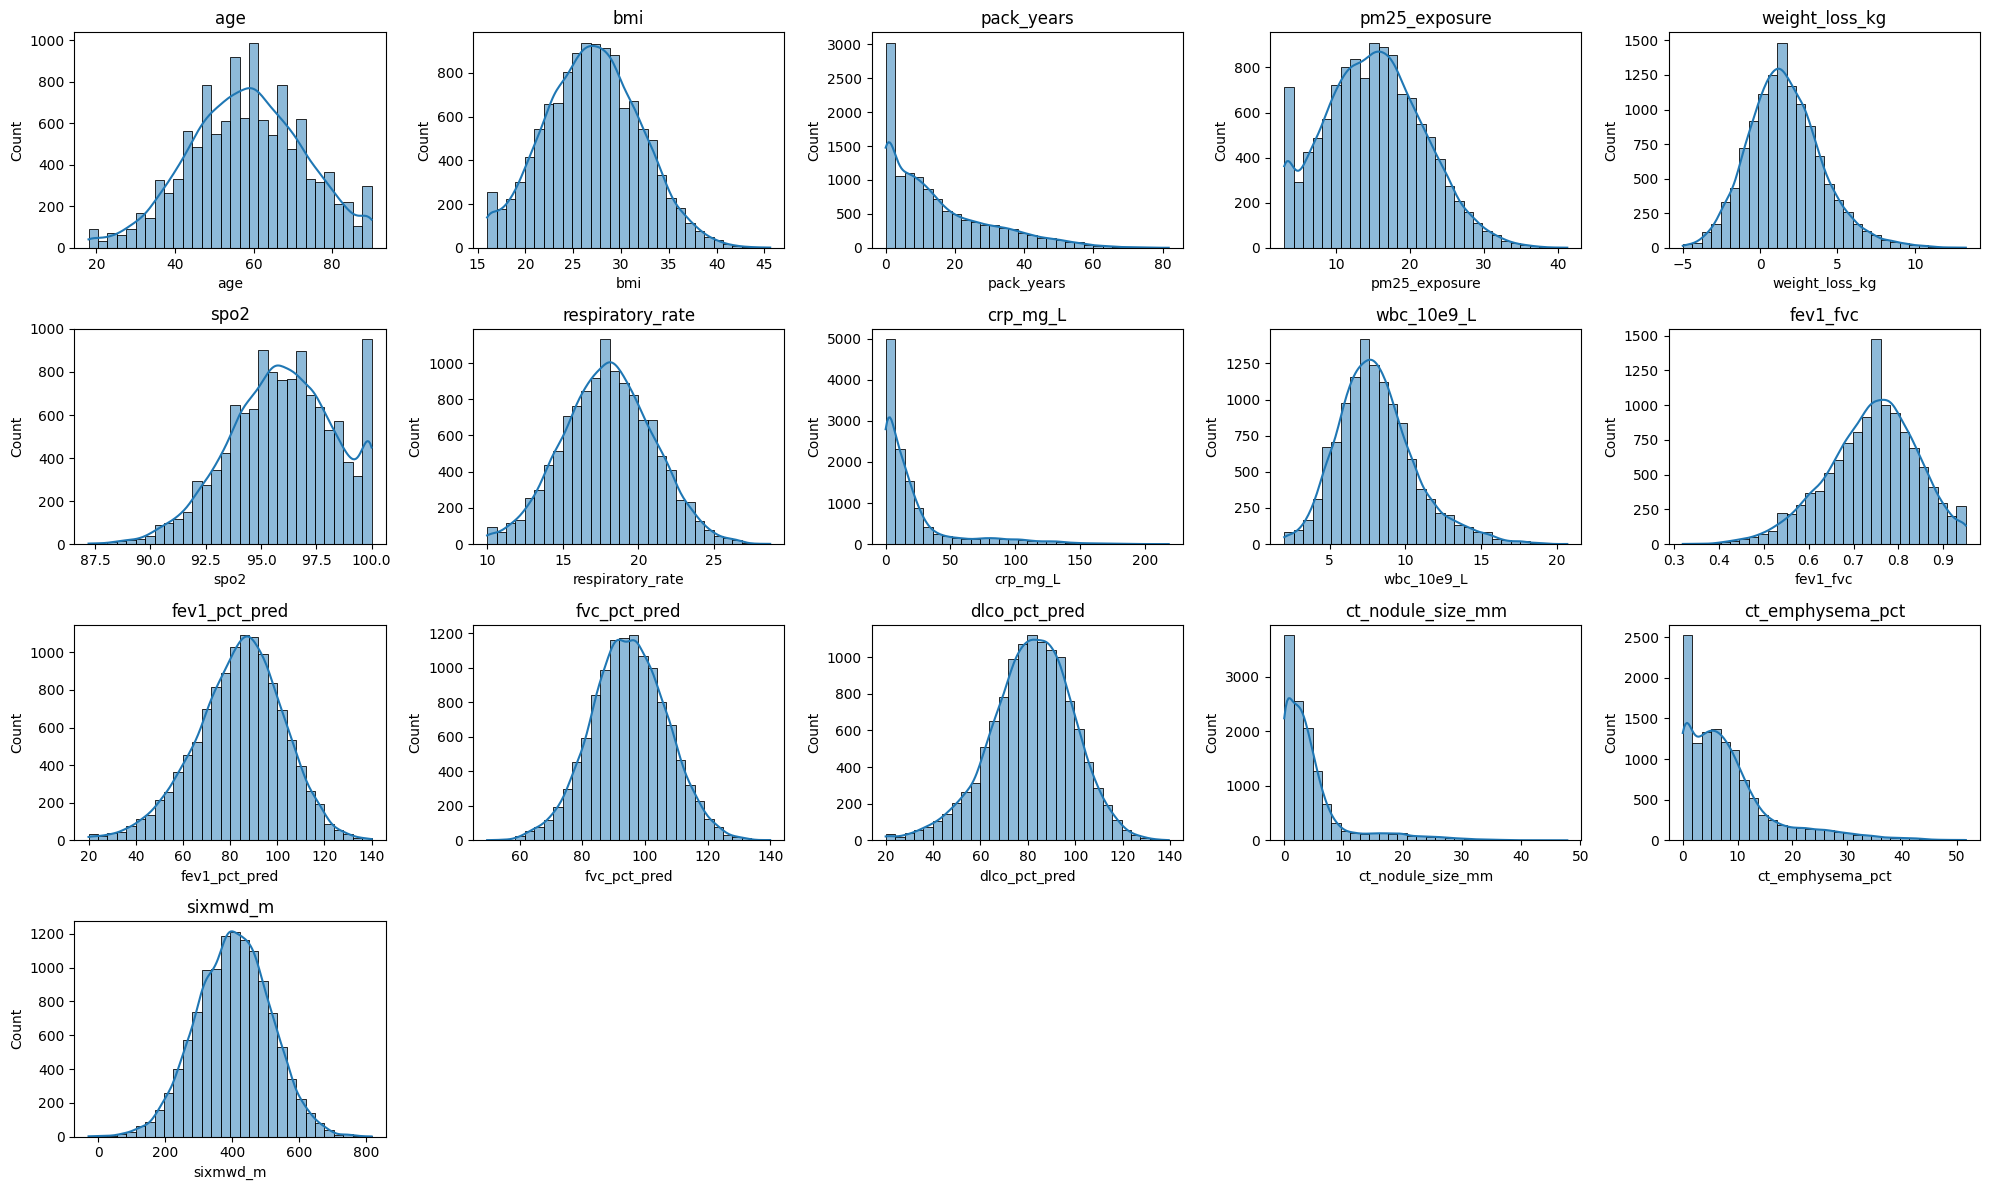

In [ ]:
cols = 5
rows = int(np.ceil(len(numerical_features) / cols))

plt.figure(figsize=(20, 12 ))
for i, col in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


The analysis of the skewness shows a large number of variables are normally distributed (Age, BMI, respiratory rate, fev1pctpred, fvcpctpred, dlcopctpred and sixmwdm). On the other hand fev1fvc and spo2 are slightly skewed right and weightlosskg is somewhat distributed with both positive and negative values hence a good idea to conduct yeo-johnson transform on them to make it more normal. Additionally, wbc10e9L and pm25exposure are are slightly right-skewed. Lastly, packyears, crpmgL, ctnodulesizemm and ctemphysemapct are strong right skewness therefore a log transform will most probably be the best option to stabilize the variance and increase the predictive signal.

**Age :** Distribution approximately normal

**BMI :** Slight right skewness

**Pack_years :** highly right-skewed.

**pm25_exposure :** Slightly right-skewed

**weight_loss_kg :** Slight right skewness

**spo2 :** left-skewed

**respiratory_rate :** pproximately normal

**crp_mg_L :** highly right-skewed

**wbc_10e9_L :** right-skewed

**fev1_fvc :** The distribution of FVC % predicted is approximately normal and symmetric

**fev1_pct_pred:** Distribution approximately normal

**fvc_pct_pred:** Distribution approximately normal

**dlco_pct_pred :** Distribution approximately normal

**ct_nodule_size_mm :** highly right-skewed

**ct_emphysema_pct :**  highly right-skewed

**sixmwd_m :** Distribution approximately normal

# Distribution of categorical_features

In [ ]:
import warnings
warnings.filterwarnings('ignore')

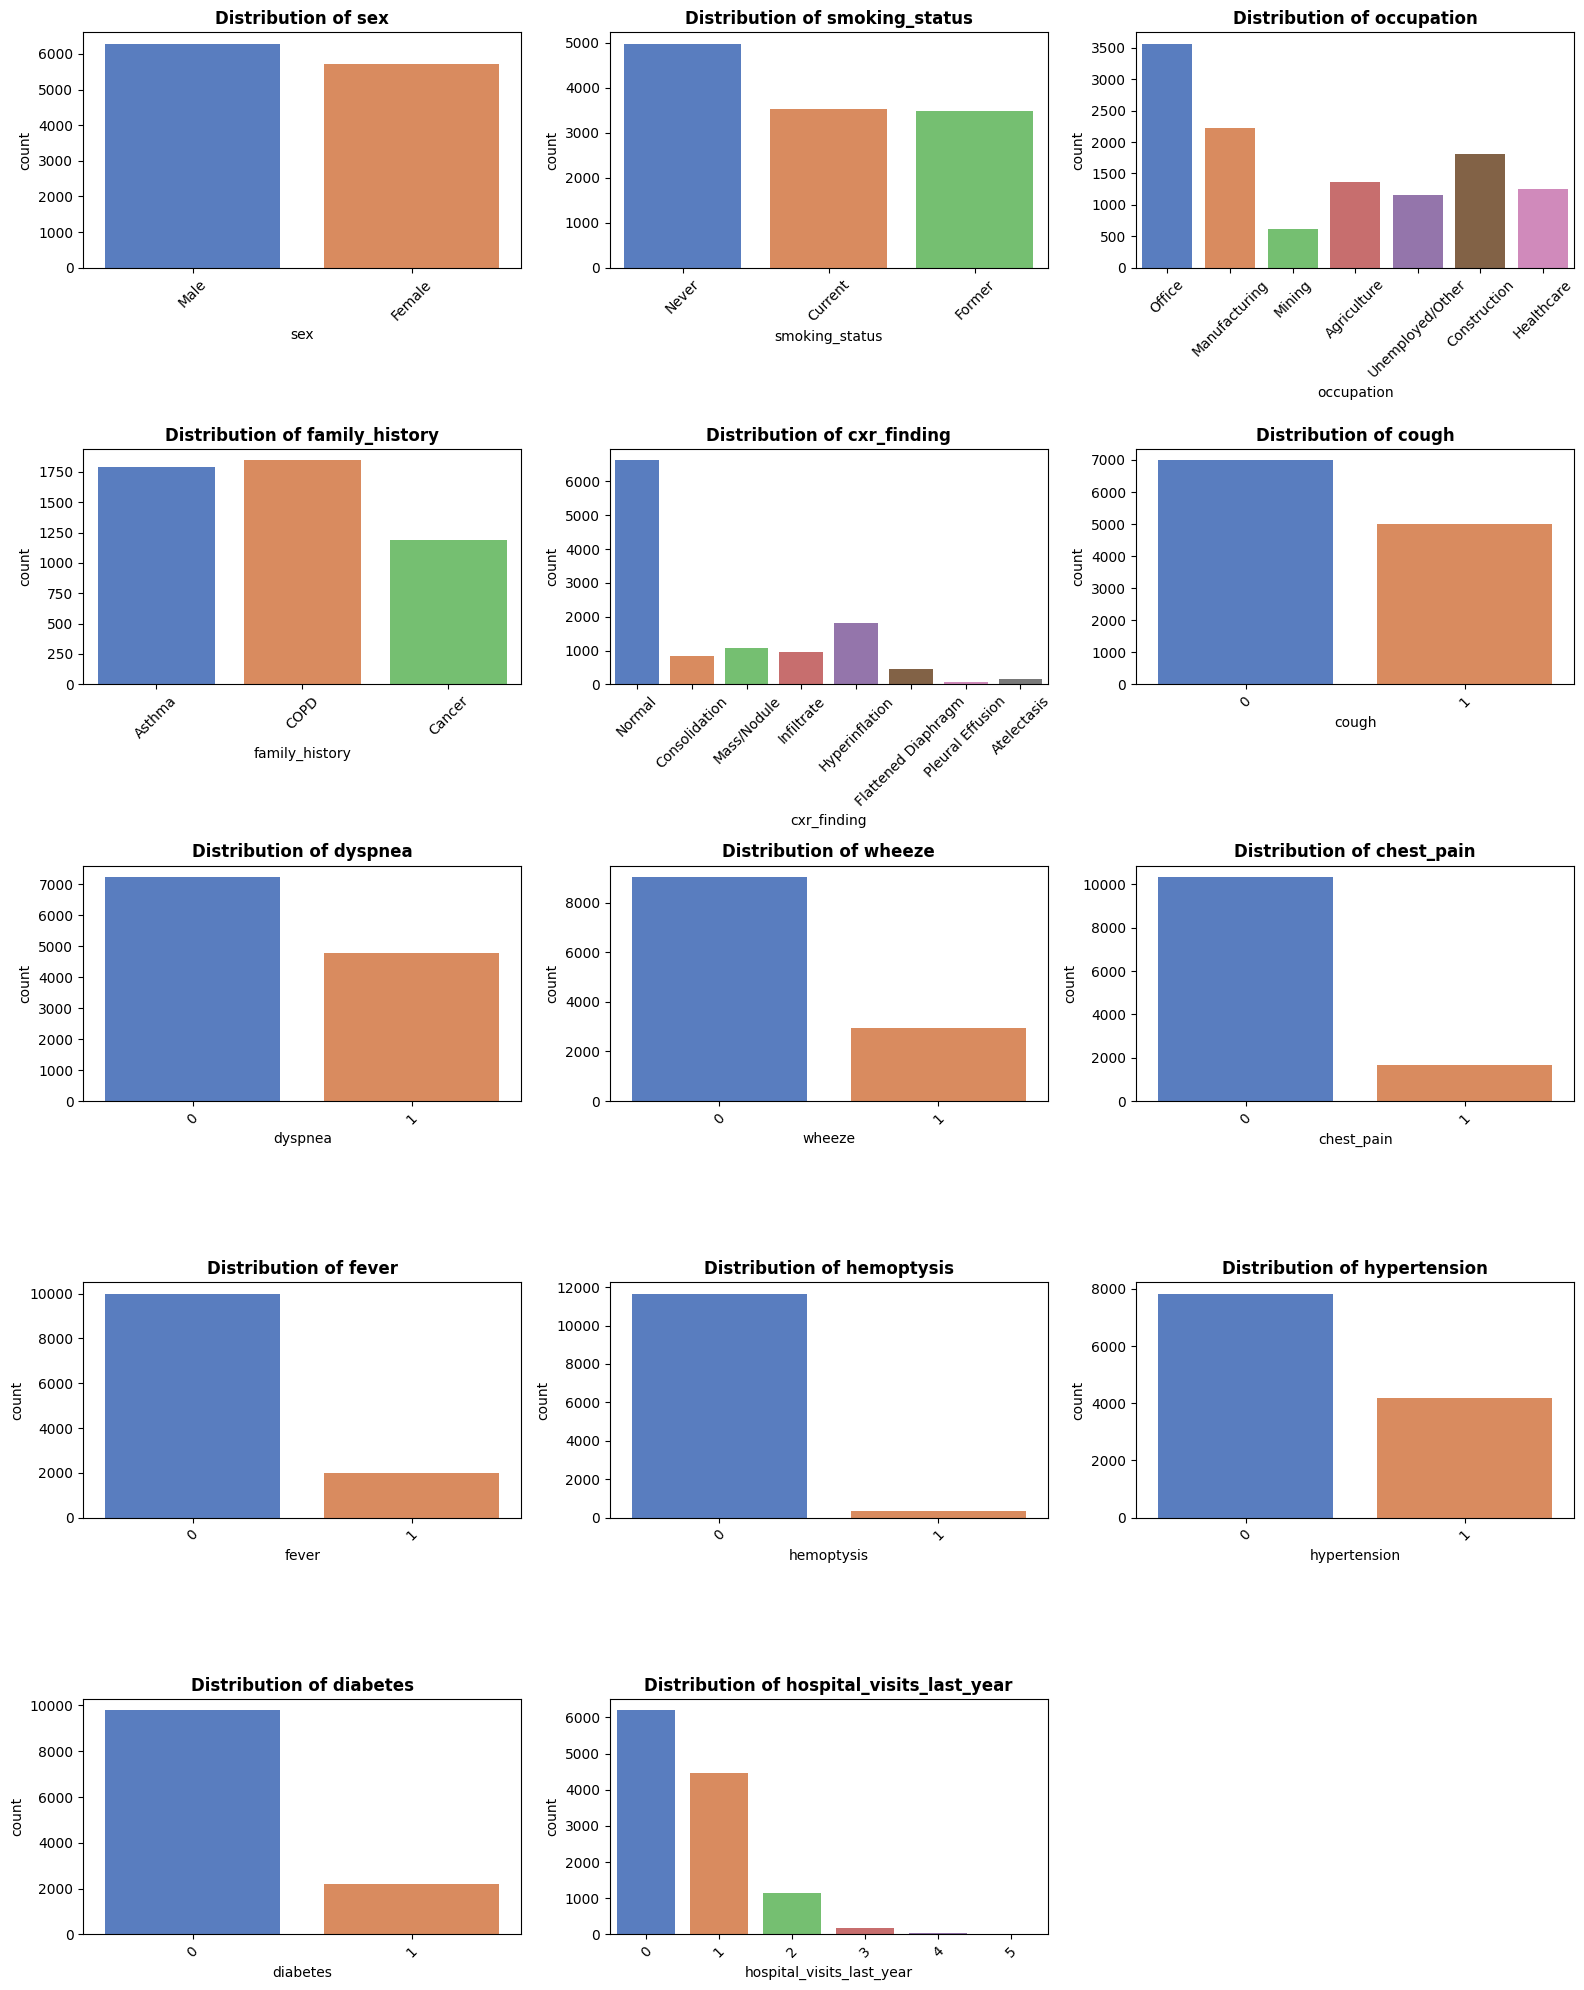

In [ ]:
n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

plt.figure(figsize=(16, 4 * n_rows))

for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(
        x=col,
        data=df,
        palette="muted"
    )
    plt.title(f"Distribution of {col}", fontsize=12, weight="bold")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


There is a balanced sex, smoking status, and family history. Alternatively, such symptoms as fever, hemoptysis, chest pain, diabetes are actually imbalanced, but that is typical of medical data containing uncommon severe cases. The occupation and CXR findings shows multiple categories.

**Sex :** Sex is relatively balanced

**Smoking_status :** Most individuals are non-smokers, while current and former smokers are less frequent.

**Occupation :** Distribution déséquilibrée entre les professions

**CXR_finding :** Most chest X-ray findings are normal, while abnormal findings are less common.

**Severity :** Most cases are mild/None, while severe cases are relatively rare.

**Cough :** Most patients do not have cough, although a notable proportion does.

**Dyspnea :** Most patients do not experience dyspnea, although it remains relatively common.

**Wheeze :** Wheeze is absent in the majority of patients.

**Chest pain :** Chest pain is rare among patients.

**Fever :** Fever is uncommon in the dataset.

**Hemoptysis :** Hemoptysis is very rare among patients.

**Hypertension :** Hypertension is present in a minority of patients.

**Diabetes :** Diabetes is uncommon in the dataset.

**Hostpital visits last year** Most patients report zero or one hospital visit in the previous year

# **Outliers detections**

In [ ]:
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age                     0
bmi                    31
pack_years            255
pm25_exposure          39
weight_loss_kg        233
spo2                   55
respiratory_rate       36
crp_mg_L             1346
wbc_10e9_L            298
fev1_fvc              137
fev1_pct_pred         159
fvc_pct_pred           78
dlco_pct_pred         184
ct_nodule_size_mm    1125
ct_emphysema_pct      824
sixmwd_m               76
dtype: int64

**From the table below, several outliers detected in each numerical feature**

Age: 0 outliers

bmi: 31 outliers

pack_years: 255 outliers

pm25_exposure: 39 outliers

weight_loss_kg: 233 outliers

spo2: 55 outliers

respiratory_rate: 36 outliers

crp_mg_L: 1346 outliers

wbc_10e9_L: 298 outliers

fev1_fvc: 137 outliers

fev1_pct_pred: 159 outliers

fvc_pct_pred: 78 outliers

dlco_pct_pred: 184 outliers

ct_nodule_size_mm: 1125 outliers

ct_emphysema_pct: 824 outliers

sixmwd_m: 76 outliers



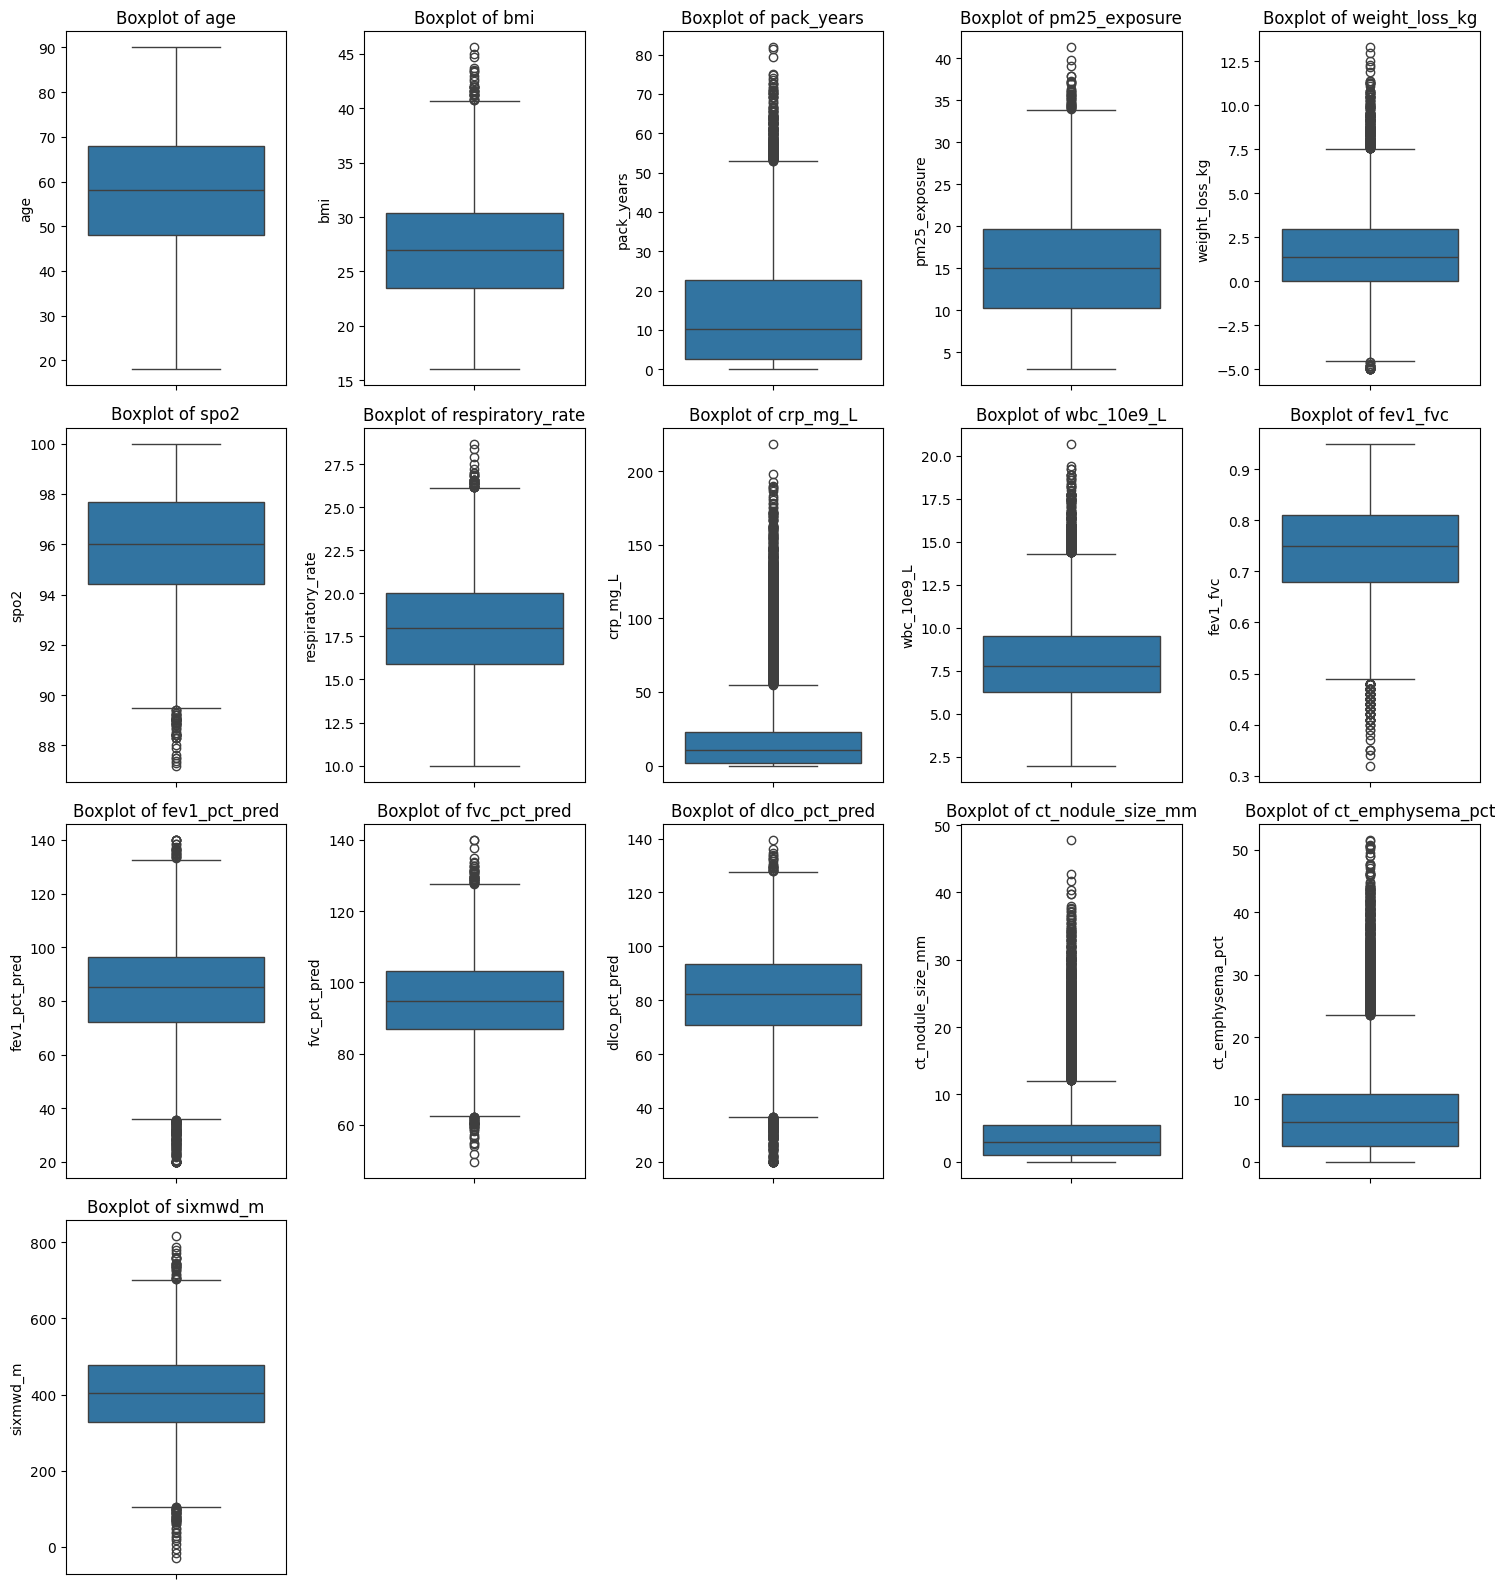

In [ ]:
##Boxplots Outliers Detection

plt.figure(figsize=(15, 4 * rows))

for i, col in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


The boxplot reveals that most numerical variables contain outliers. Age appears well distributed with no extreme outliers but BMI, PM2.5 exposure, weight loss, respiratory rate, WBC, and the sixmwd show several outliers also Pack-years, CRP levels, CT nodule size, and CT emphysema percentage exhibit a large number of high-value outliers. Additionally, SpO₂, FEV1/FVC, FEV1 predicted, FVC, and DLCO present several low-value outliers, which may reflect patients with more severe respiratory impairment.

**Age**
* The median age is around 58–60 years
* No extreme outliers are observed

**BMI**

* The median BMI is approximately 26–27
* Several high-value outliers are observed above 40

**Pack years**

*   A large number of high-value outliers are observed, extending beyond 50 pack years

**PM2.5 exposure**

* The median PM2.5 exposure is around 15
* Several high-value outliers are observed above 30

**Weight loss**

* The median weight loss is close to 1–2 kg
* Several high-value outliers are observed above 8–12
* Negative outliers are present

**SpO₂**

* The median SpO₂ value is around 96–97
* Several low-value outliers are observed below 90

**Respiratory rate**

* The median respiratory rate is approximately 18
* Several high-value outliers are observed above 25

**CRP**

* The median CRP value is relatively low
* A large number of high-value outliers are observed, extending well above 50

**WBC**

* The median WBC value is around 7–8
* Several high-value outliers are observed above 14

**FEV1/FVC**

* The median FEV1/FVC ratio is approximately 0.74–0.76
* Several low-value outliers are observed below 0.50

**FEV1 **
* The median FEV1  is approximately 85
* Several low-value outliers are observed below 4
* A small number of high-value outliers are present above 13

**FVC**

* The median FVC   is approximately 95
* Several low-value outliers are observed below 65
* Several high-value outliers are present above 130

**DLCO**

* The median DLCO  is approximately 80–82
* Several low-value outliers are observed below 40
* Several high-value outliers are present above 130

**ct nodule**

* A large number of high-value outliers are observed, extending beyond 10

**CT emphysema**

* A substantial number of high-value outliers are observed above 20


**SIXMWD*

* The median six-minute walk distance is approximately 400
* Several low-value outliers are observed below 100
* High-value outliers above 700









# **Features correleation**

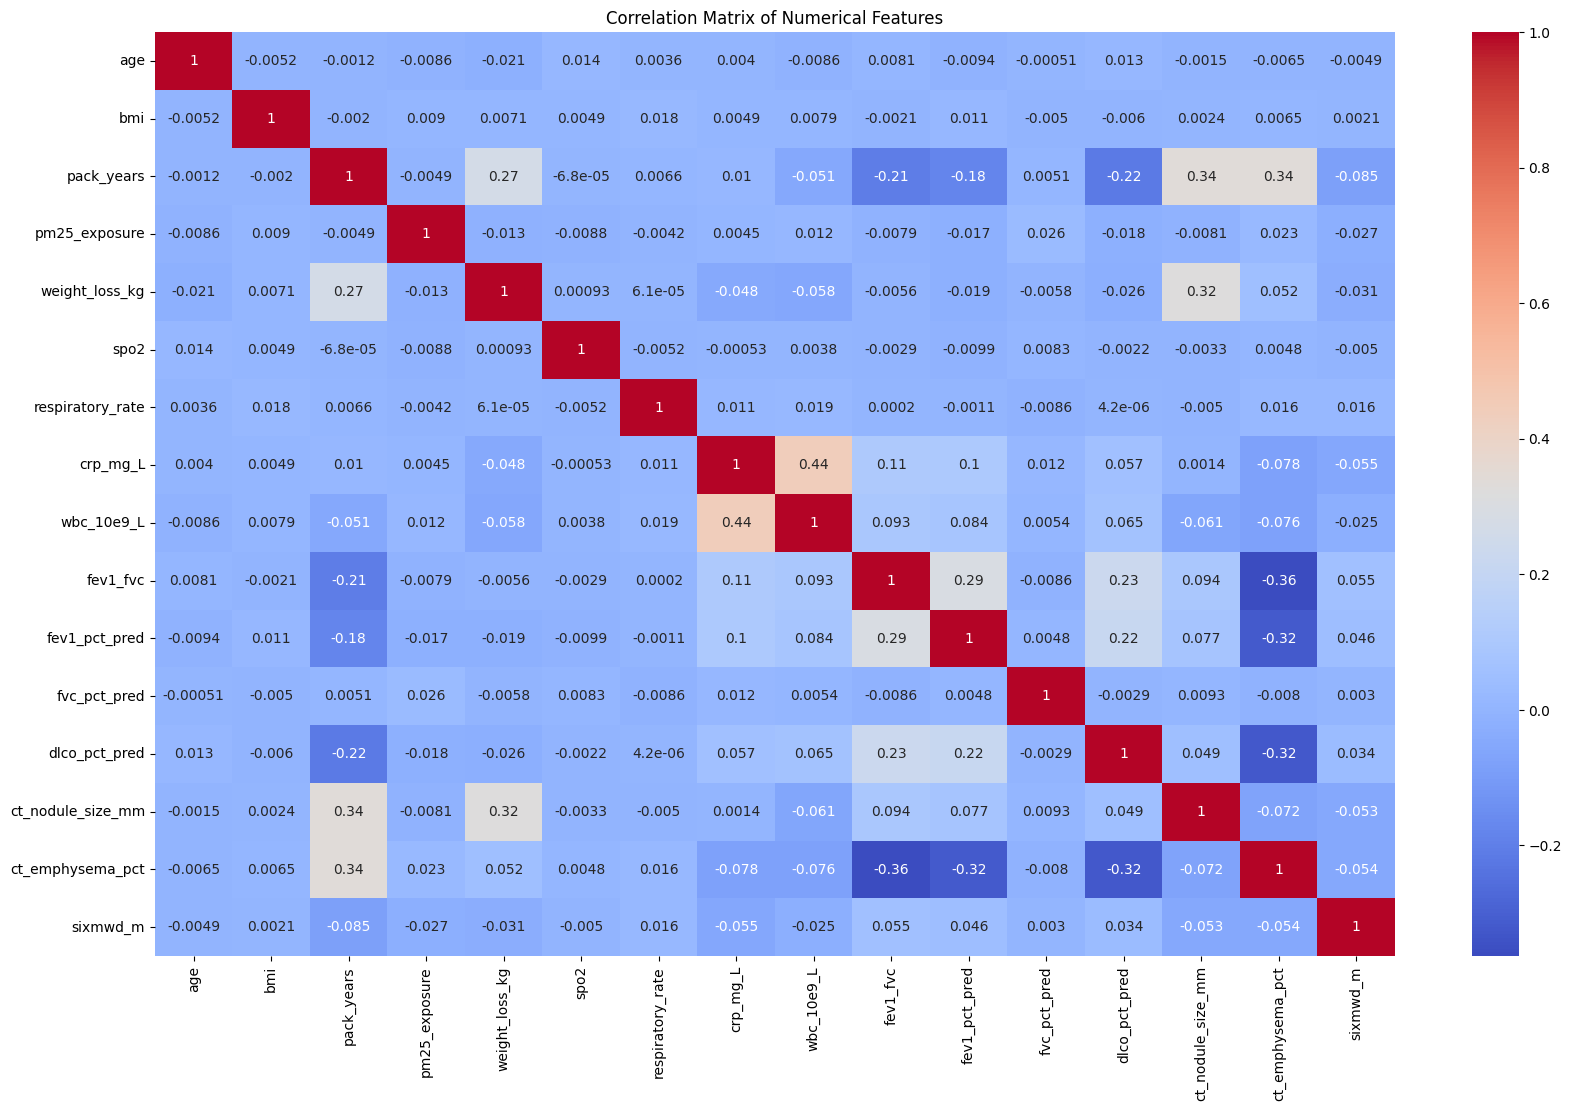

In [ ]:
# Correlation Analysis
plt.figure(figsize=(20,12))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Correlation matrix indicates that majority of the features are not correlated with a large percentage, which means that there is no multicollinearity. There are moderate correlations between CRP and WBC, and between the indicators of lung function (FEV1,FVC,DLCO). Generally, the features give complementary information and can be stored to be used to model.

No severe multicollinearity detected → most features can be retained.


# Categorical Features vs Target

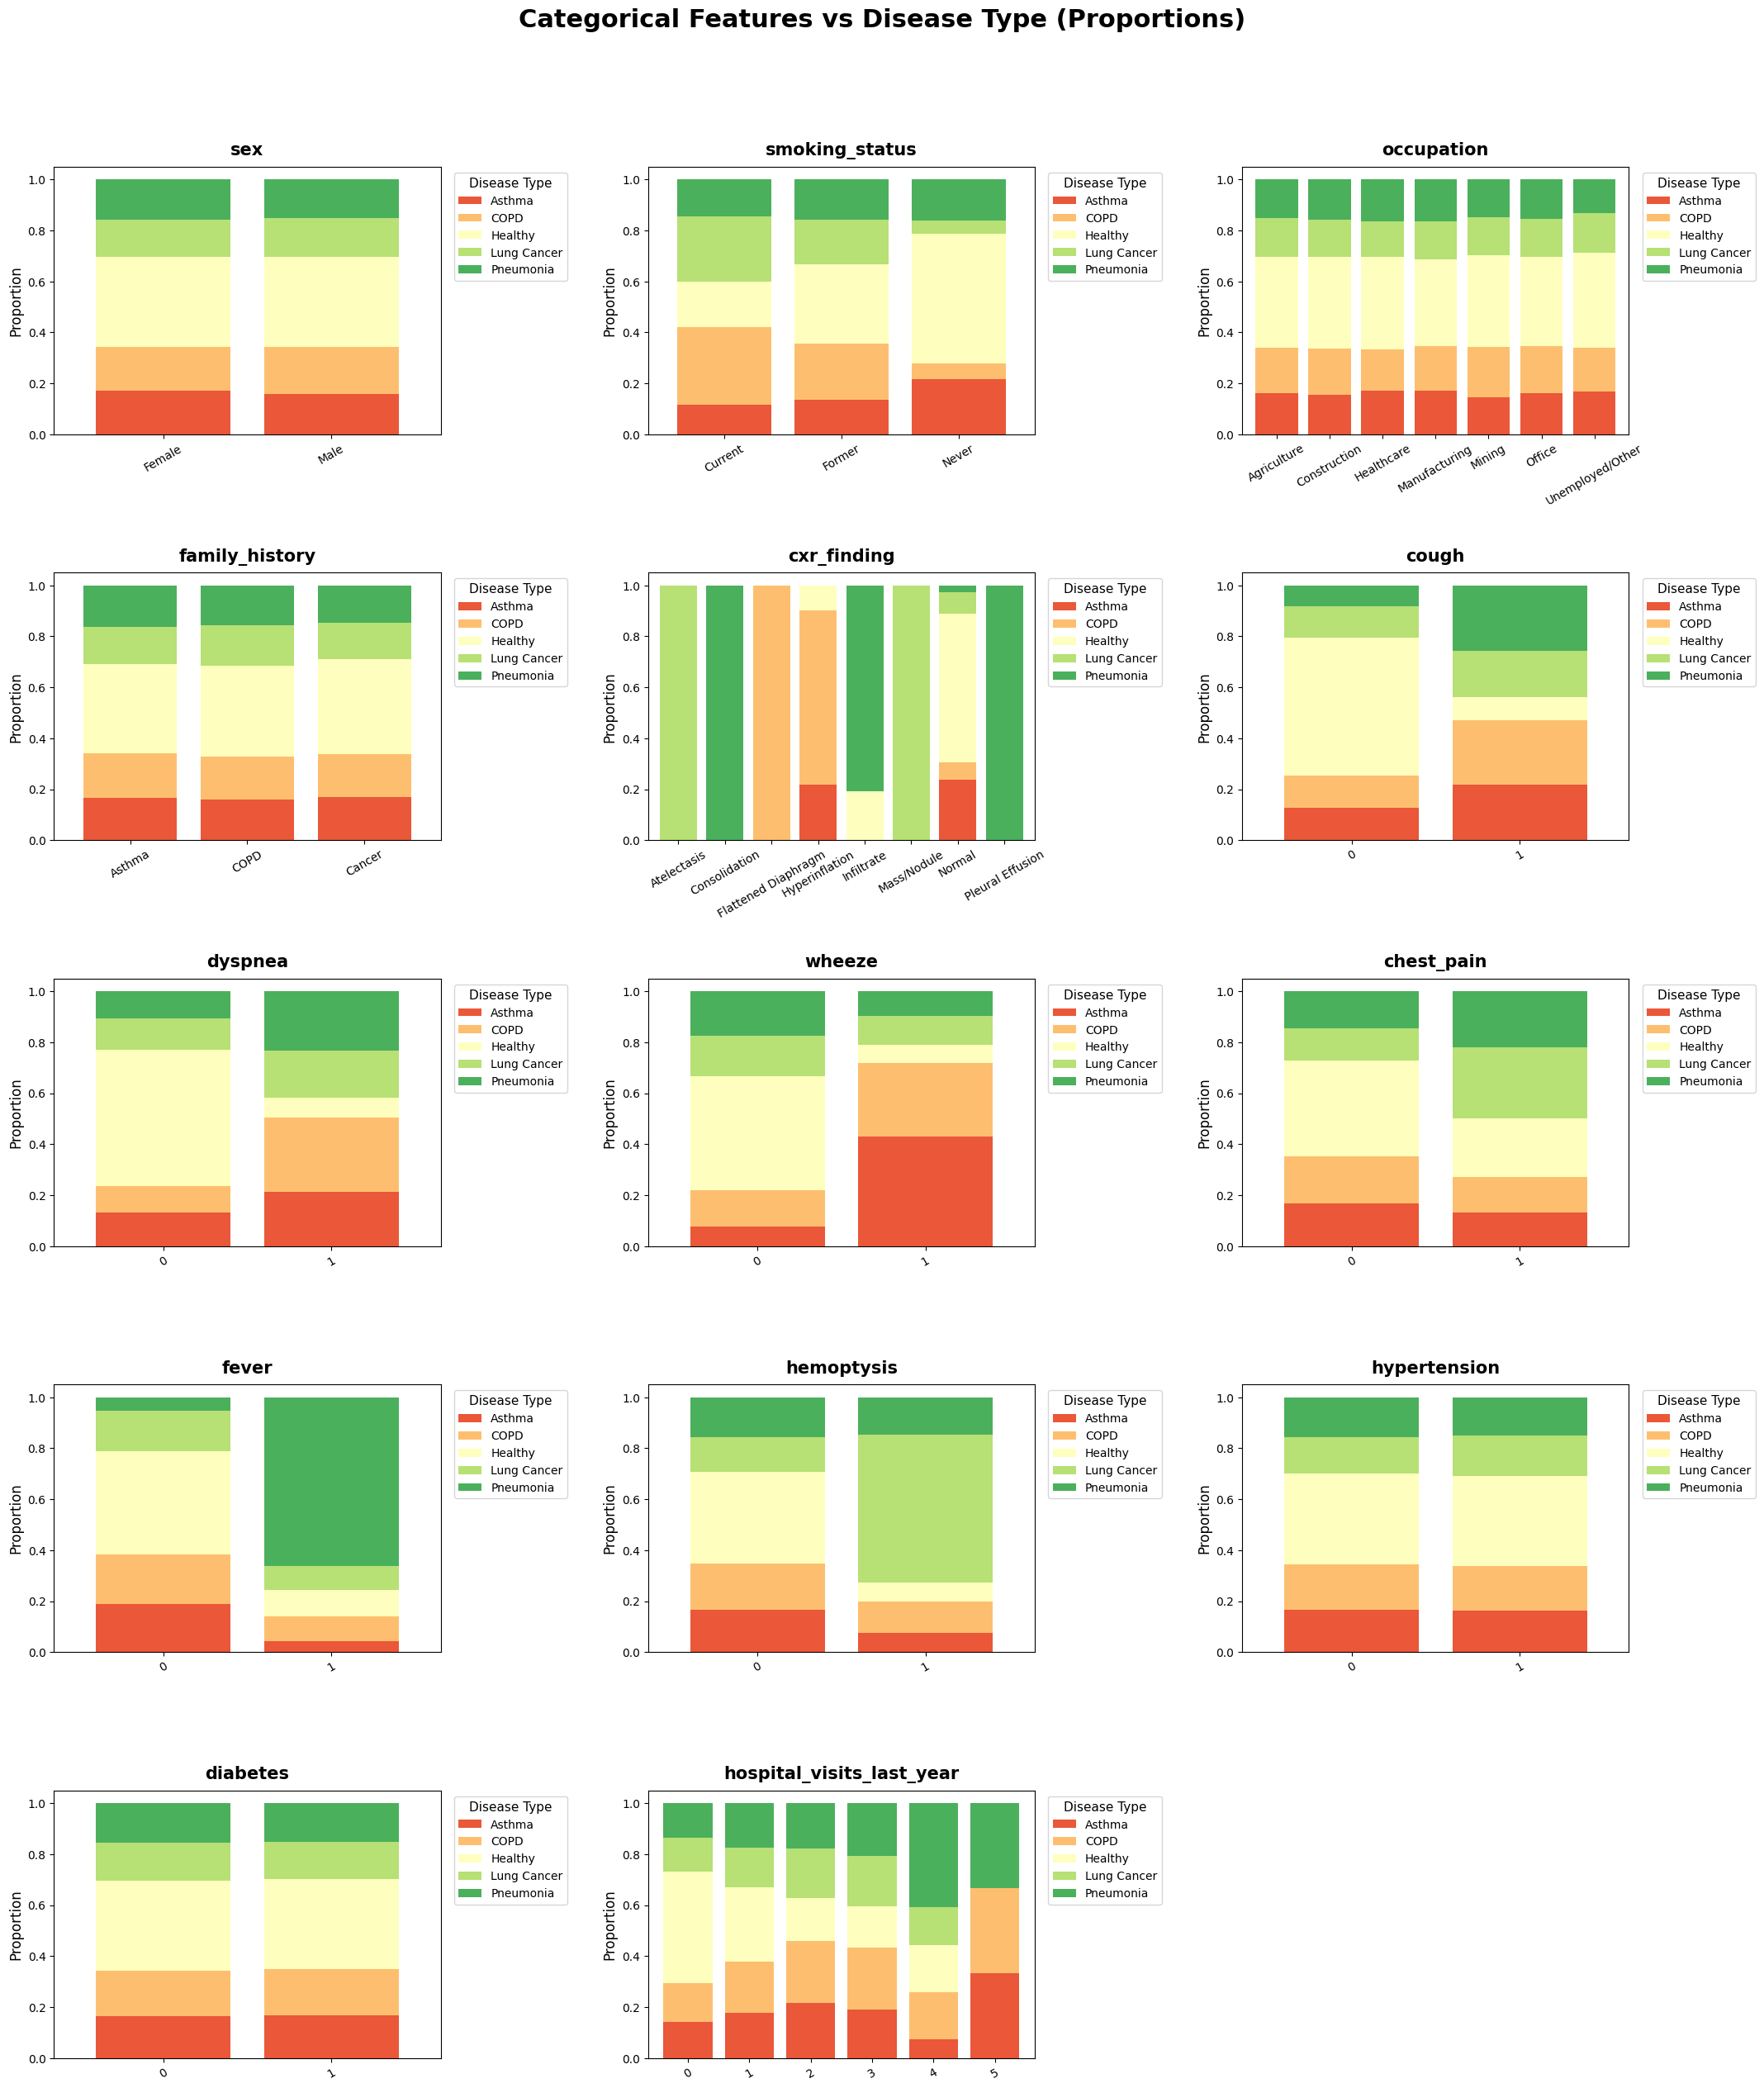

In [ ]:
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(22, 5 * n_rows))
ax = ax.flatten()

for i, col in enumerate(categorical_features):
    pd.crosstab(df[col], df['disease_type'], normalize='index').plot(
    kind='bar',
    stacked=True,
    ax=ax[i],
    color=sns.color_palette("RdYlGn", n_colors=df["disease_type"].nunique()),
    width=0.8
)

    ax[i].set_title(col, fontsize=15, pad=10, weight="bold")
    ax[i].set_ylabel('Proportion', fontsize=12)
    ax[i].set_xlabel('')
    ax[i].legend(title='Disease Type',fontsize=10,title_fontsize=11,loc='upper left',bbox_to_anchor=(1.02, 1)
)
    ax[i].tick_params(axis='x', rotation=30, labelsize=10)
    ax[i].tick_params(axis='y', labelsize=10)


for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.suptitle(
    'Categorical Features vs Disease Type (Proportions)',
    fontsize=22,
    weight='bold',
    y=1.02
)

plt.tight_layout(pad=3.0)
plt.show()

**Sex**

* The distribution between men and women is broadly balanced.

* No marked differences according to sex, suggesting low discriminatory power for disease classification.


**Smoking Status**

* Current and former smokers have a higher proportion of COPD and lung cancer.

* Non-smokers are mainly associated with the Healthy group.

* Highly informative variable, consistent with medical literature.

**Occupation**

* Distributions are relatively homogeneous across occupations.

* No occupation shows a clear predominance of a specific pathology.


**Family History**

* The differences between categories are small.

* The proportions of diseases are very similar from one group to another.

* No strong visual pattern emerges.

**Cough**

* The presence of cough is associated with a decrease in Healthy profiles.

* Notable increase in cases of pneumonia and COPD when cough is present.

* Highly discriminating variable.

**Dyspnea**

* Strong association with COPD and pneumonia.

* Individuals without dyspnea are predominantly healthy.

* Very good clinical predictor.

**Wheeze**

* Presence strongly linked to asthma and COPD.

* Key variable for differentiating asthma.

**Chest Pain**

* The presence of chest pain is associated with an increase in severe pathologies, particularly cancer.

* Absence of pain strongly linked to healthy profiles.

* Informative variable but less specific.

**Fever**

* Fever is very strongly associated with pneumonia.

* In its absence, healthy profiles largely dominate.

* Highly discriminating variable, almost a signature of pneumonia.

**Hemoptysis**

* The presence of hemoptysis causes a radical change in the distribution of diseases.

* Lung cancer becomes largely dominant when hemoptysis is present.

* Significant decrease in Healthy profiles in cases of hemoptysis.

* Pneumonia remains present but at a secondary level.

**Hypertension**

* The distribution of diseases is very similar between individuals with and without hypertension.

* No pathology shows a clear overrepresentation linked to hypertension.

* The Healthy group remains in the majority in both categories.

* The proportions of asthma and COPD are almost identical regardless of hypertensive status.

* The variations observed are small and not very significant visually.

* This variable provides little information for predicting the type of respiratory disease.

**CXR Findings**

* Chest X-ray results show very clear differences between types of diseases.

* The CXR finding variable is one of the most discriminating in the dataset.

* Each radiological pattern is associated with a dominant pathological profile.


# Numerical Features vs Target Distribution

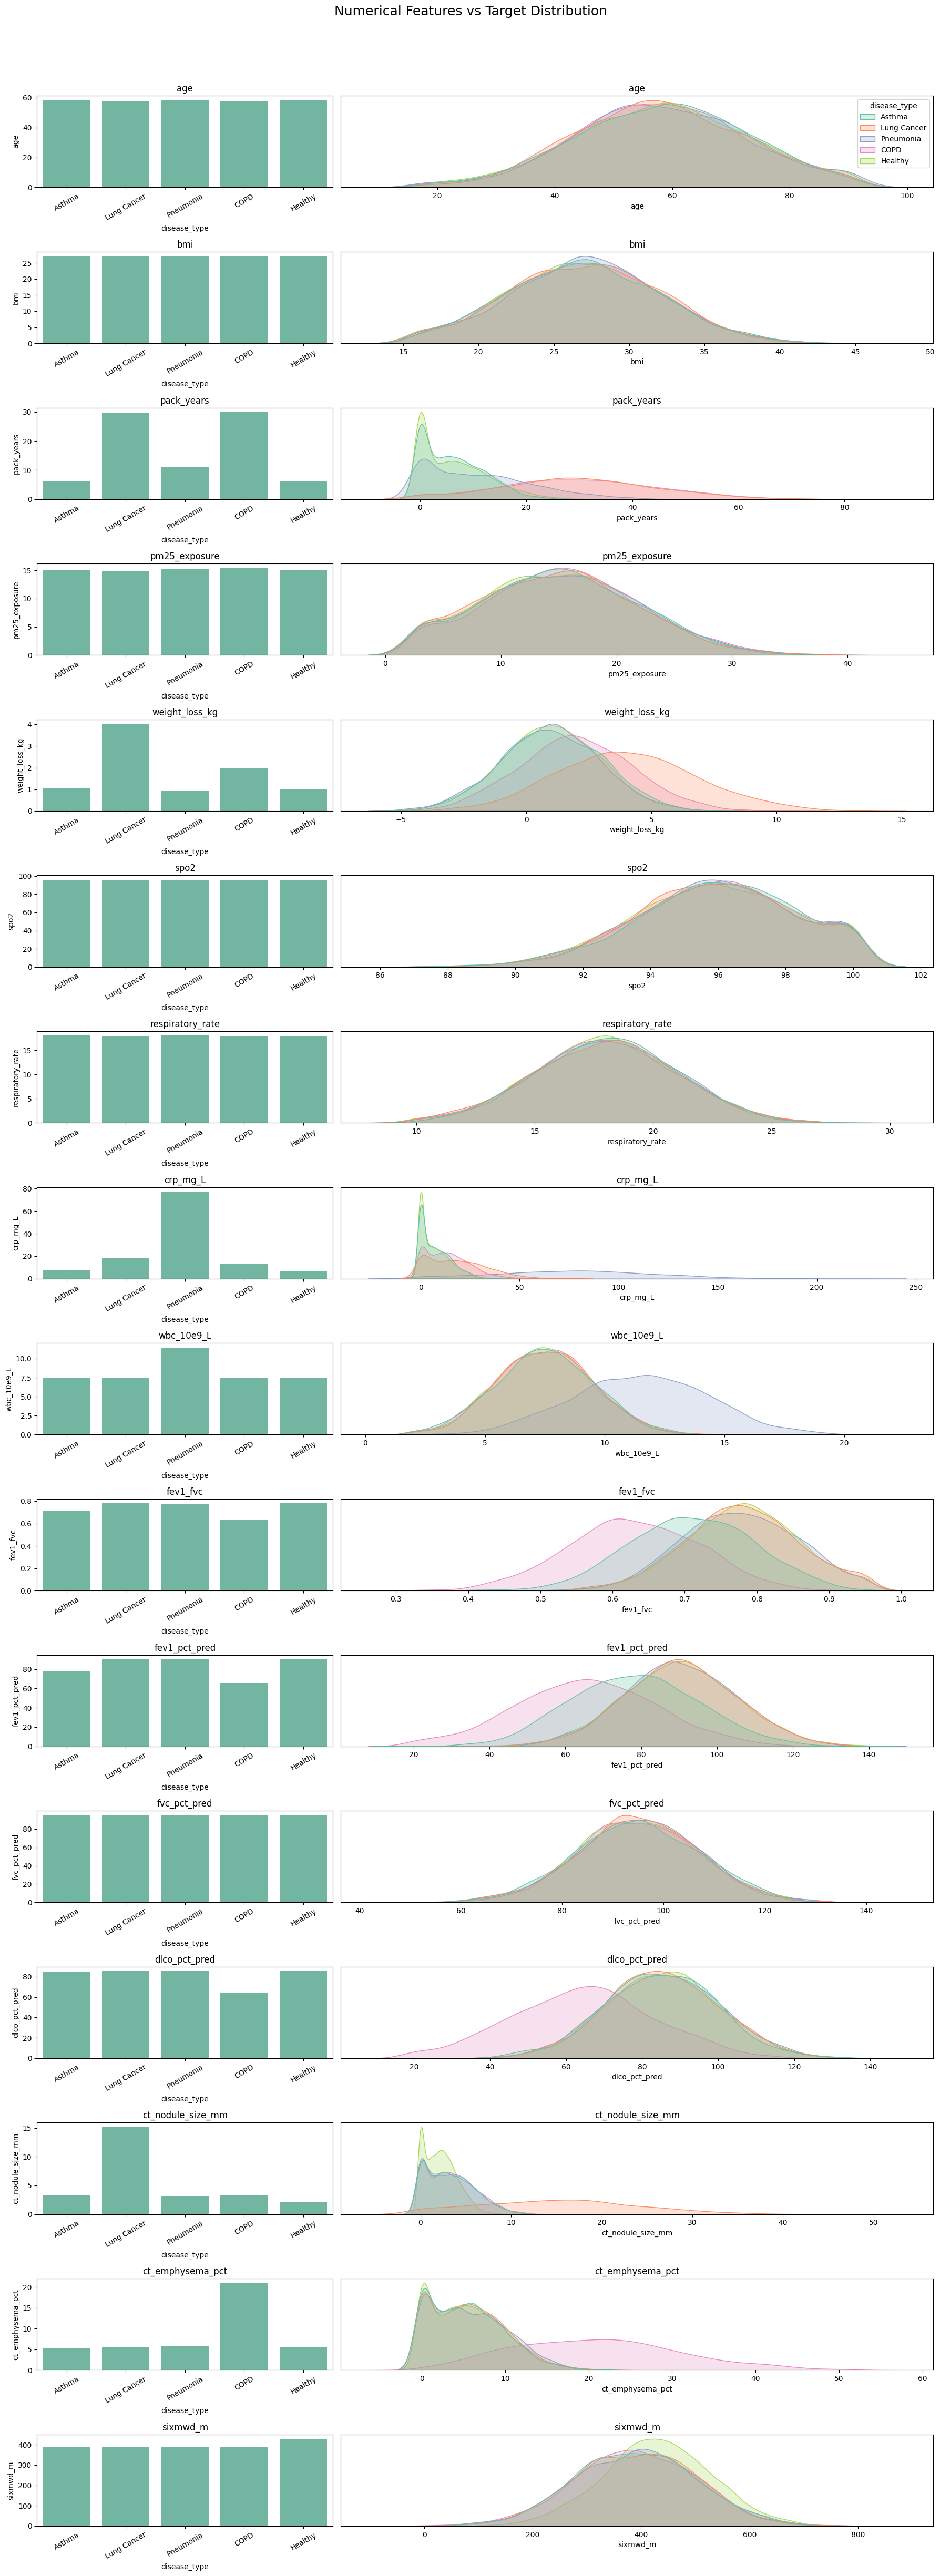

In [ ]:
sns.set_palette(sns.color_palette("Set2", n_colors=df["disease_type"].nunique()))

rows = len(numerical_features)

fig, ax = plt.subplots(
    rows, 2,
    figsize=(18, rows * 3.0),
    gridspec_kw={'width_ratios': [1, 2]}
)

if rows == 1:
    ax = ax.reshape(1, 2)

for i, col in enumerate(numerical_features):

    sns.barplot(data=df, x="disease_type", y=col, ax=ax[i, 0], errorbar=None)
    ax[i, 0].tick_params(axis='x', rotation=30)
    ax[i, 0].set_title(col, fontsize=12)


    sns.kdeplot(
        data=df, x=col, hue="disease_type",
        fill=True, ax=ax[i, 1], legend=(i == 0),
        common_norm=False
    )
    ax[i, 1].set_yticks([])
    ax[i, 1].set_ylabel('')
    ax[i, 1].set_title(col, fontsize=12)

plt.suptitle('Numerical Features vs Target Distribution', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


# Task 2: Data Preparation

`Identify missing values`

---



To manage NaNs, it was decided that they will be replaced with the explicit value of the variable,which is the category none this will not cause information loss as it preserves the original clinical meaning of the variable.

In [ ]:
df["family_history"] = df["family_history"].fillna("None")

**Decision made**
---


**Binary Variables (No One-Hot Encoding Required)**

Binary variables represent the presence or absence of a condition or symptom and are already correctly expressed in a numerical form.


* Symptoms: cough, dyspnea, wheeze, chest_pain, fever, hemoptysis,hypertension, diabetes

Encoding decision:
These variables were kept in their original 0/1 format, as one-hot encoding would add redundant features without providing additional information.

**Nominal Categorical Variables (One-Hot Encoding Required)**

Nominal variables represent categories with no inherent ordering. Encoding them as integers would implicitly introduce a false ordinal relationship, which could negatively impact model performance.

* smoking_status (Never, Former, Current)

* occupation (Office, Manufacturing, etc.)

* cxr_finding (Normal/Consolidation...)

* sex

* family_history


Encoding decision:
These variables were one-hot encoded to preserve their categorical nature while preventing artificial numerical ordering.

**Ordinal Variables (Preserve Order – No One-Hot Encoding)**

Ordinal variables have a meaningful ranking that should be retained for the model.
* family_history

**MinMaxscaling** is that the distance-sensitive models, such as k -nearest neighbors and SVMs, are compatible with the degree of feature reduction - the scales simply fall directly into the distance calculation. Min-max also ensures that all features stand an equal opportunity to contribute to the training process, and that no single feature is likely to cause too much wobbling to the training process.


**Split the data**

---



An 80/20 train-test split was used to balance model learning and evaluation. With 12,000 observations, this ratio provides sufficient data for training while preserving a representative test set to assess generalization performance.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('disease_type', axis=1)
y = df['disease_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Two preprocessing pipelines were designed according to model sensitivity to feature distribution. Pipeline A used logarithmic and YeoJohnson transformation of skewed variables, MinMax scaling of numerical features, and one-hot encoding of categorical features. This pipeline was used on distribution-sensitive models including Logistic regression, SVM and KNN.

**Pipeline A (Logistic Regression / SVM / KNN) → Johnson + log + MinMax + OneHot**

---



In order to prepare the data of Pipeline A, a copy of the training and testing data was made. Highly right-skewed variables (pack-years,CRP_levels,CT_nodule_size and emphysema percentage) were transformed logarithmically to decrease skewness and stabilize the variance. Moreover, Yeo-Johnson power transformation was applied in the variables that had zero or negative values, such as weight_loss,WBC and PM 2.5_exposure, to turn their distributions to be more balanced and fit machine learning algorithms.

In [ ]:
#Create a copy for Pipeline A.
X_train_A_raw = X_train.copy()
X_test_A_raw  = X_test.copy()


In [ ]:
#Logarithmic Transformation of Skewed Clinical Features
log_cols = ["pack_years", "crp_mg_L", "ct_nodule_size_mm", "ct_emphysema_pct"]


X_train_A_raw[log_cols] = np.log1p(X_train_A_raw[log_cols])
X_test_A_raw[log_cols]  = np.log1p(X_test_A_raw[log_cols])


In [ ]:
#yeo-johnson Transformation

from sklearn.preprocessing import PowerTransformer

johnson_cols = ["weight_loss_kg","wbc_10e9_L","pm25_exposure"]
pt = PowerTransformer(method="yeo-johnson")

X_train_A_raw[johnson_cols] = pt.fit_transform(X_train_A_raw[johnson_cols])
X_test_A_raw[johnson_cols]  = pt.transform(X_test_A_raw[johnson_cols])


In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_features = [
    "age","bmi","pack_years","pm25_exposure",
    "weight_loss_kg","spo2","respiratory_rate","crp_mg_L","wbc_10e9_L",
    "fev1_fvc","fev1_pct_pred","fvc_pct_pred","dlco_pct_pred",
    "ct_nodule_size_mm","ct_emphysema_pct",
    "sixmwd_m"
]

categorical_features = ["sex", "smoking_status", "occupation", "family_history", "cxr_finding"]

numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor_A = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

X_train_A = preprocessor_A.fit_transform(X_train_A_raw)
X_test_A  = preprocessor_A.transform(X_test_A_raw)

feature_names_A = list(preprocessor_A.named_transformers_['cat'].get_feature_names_out(categorical_features))
remaining_names = ['cough','dyspnea','wheeze','chest_pain','fever','hemoptysis','hypertension','diabetes','hospital_visits_last_year']
all_feature_names_A = numerical_features + feature_names_A + remaining_names

X_train_A = pd.DataFrame(X_train_A, columns=all_feature_names_A, index=X_train.index)
X_test_A  = pd.DataFrame(X_test_A, columns=all_feature_names_A, index=X_test.index)

display(X_train_A.head())
display(X_test_A.head())

age       bmi pack_years pm25_exposure weight_loss_kg      spo2  \
9182   0.305556  0.368243   0.688282      0.377759       0.184335  0.828125   
11091  0.638889  0.334459        0.0      0.149512       0.481774    0.6875   
6428   0.402778  0.310811   0.401898      0.319227       0.325093  0.359375   
288    0.388889  0.527027   0.446986      0.011757       0.206366  0.820312   
2626   0.902778       0.0   0.492423           0.0       0.481774  0.601562   

      respiratory_rate  crp_mg_L wbc_10e9_L  fev1_fvc  ...  \
9182          0.449198   0.26616    0.59708  0.904762  ...   
11091         0.524064  0.802473   0.801178  0.793651  ...   
6428          0.272727       0.0   0.577221  0.650794  ...   
288           0.513369       0.0    0.50357  0.650794  ...   
2626          0.449198  0.319516   0.302149  0.761905  ...   

      cxr_finding_Pleural Effusion cough dyspnea wheeze chest_pain fever  \
9182                           0.0     0       0      0          0     0   
11091                          0.0     0       1      0          0     0   
6428                           0.0     0       0      0          0     0   
288                            0.0     0       0      0          0     0   
2626                           0.0     1       0      0          0     0   

      hemoptysis hypertension diabetes hospital_visits_last_year  
9182           0            0        0                         1  
11091          0            0        0                         0  
6428           0            0        0                         0  
288            0            0        1                         0  
2626           0            1        0                         0  

[5 rows x 49 columns]

age       bmi pack_years pm25_exposure weight_loss_kg      spo2  \
1935  0.708333  0.172297   0.825429      0.181666       0.176933    0.5625   
6494  0.791667  0.405405   0.413128      0.380492       0.568584  0.773437   
1720  0.305556  0.672297   0.494982      0.511997       0.410765       1.0   
9120     0.375  0.334459   0.699896      0.549741       0.405051  0.726562   
360   0.638889       0.0        0.0      0.034635       0.363503  0.984375   

     respiratory_rate  crp_mg_L wbc_10e9_L  fev1_fvc  ...  \
1935         0.176471  0.869577   0.611666  0.619048  ...   
6494         0.550802  0.390247    0.10859  0.634921  ...   
1720         0.550802       0.0   0.452264   0.68254  ...   
9120         0.320856  0.421403   0.294834  0.634921  ...   
360          0.684492  0.363532   0.416013  0.619048  ...   

     cxr_finding_Pleural Effusion cough dyspnea wheeze chest_pain fever  \
1935                          0.0     1       0      0          1     1   
6494                          0.0     1       1      1          0     0   
1720                          0.0     0       1      0          1     0   
9120                          0.0     1       1      0          0     0   
360                           0.0     1       0      1          1     0   

     hemoptysis hypertension diabetes hospital_visits_last_year  
1935          0            0        0                         0  
6494          0            1        0                         0  
1720          0            1        0                         1  
9120          0            0        0                         3  
360           0            1        0                         1  

[5 rows x 49 columns]

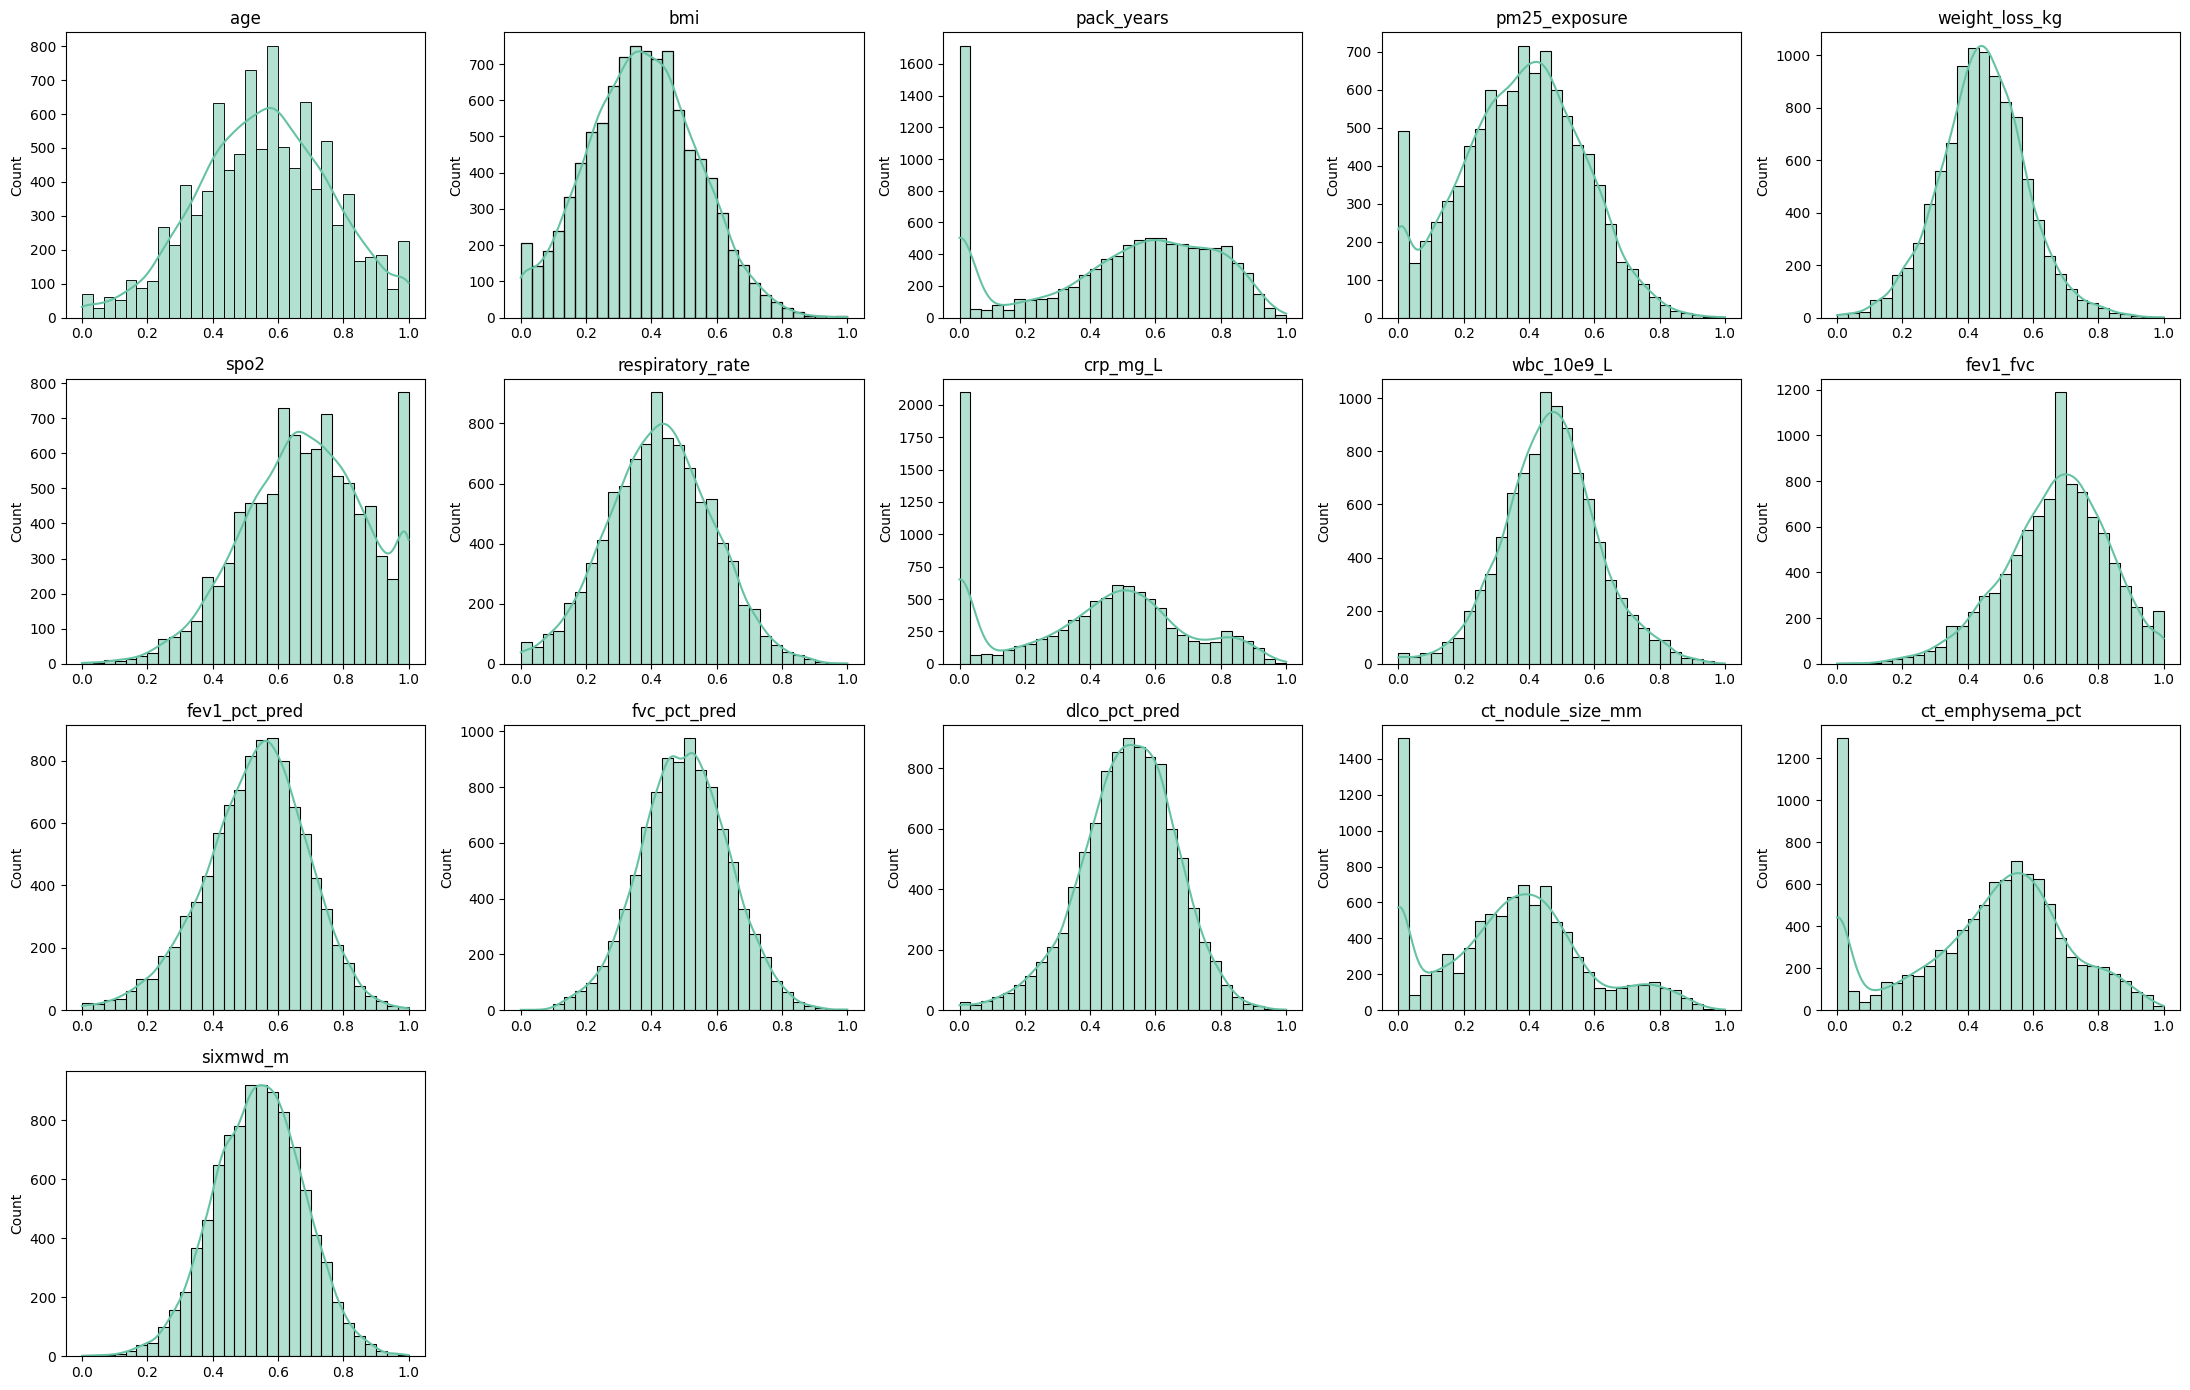

In [ ]:
##"Distribution of Numerical Variables After Preprocessing (Pipeline A

df_num = X_train_A[numerical_features]

cols = 5
rows = int(np.ceil(len(df_num.columns) / cols))

plt.figure(figsize=(22, 14))

for i, col in enumerate(df_num.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df_num[col], kde=True, bins=30)
    plt.title(col)
    plt.xlabel("")
    plt.tight_layout()

plt.show()


The figure depicts the distributions of the numerical variables when Pipeline A was used. The majority of variables have become more balanced and centered, which means that the transformations and standardization have increased the stability of data. A certain concentration of lower values still occurs, which is typical of medical data and not a data problem.

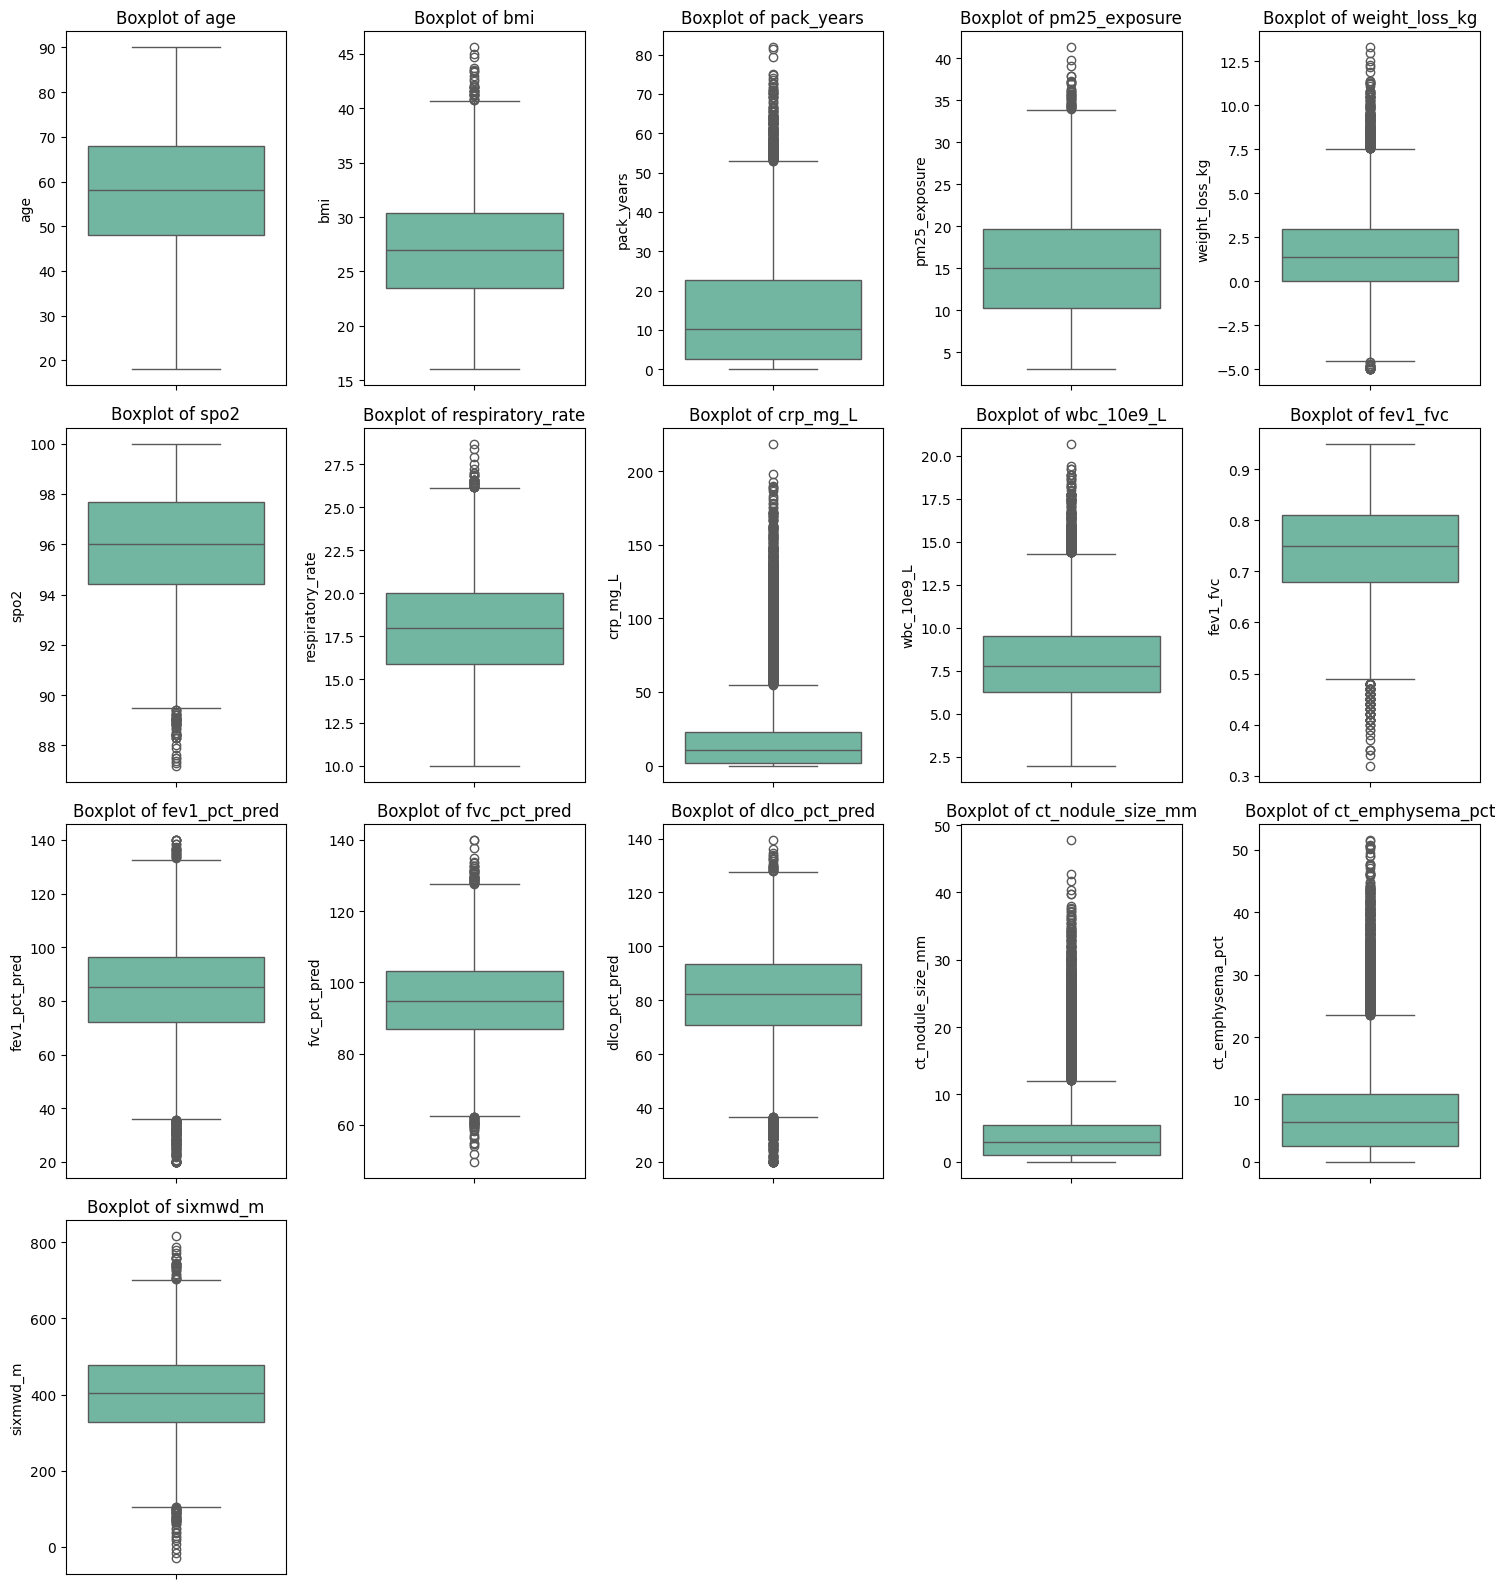

In [ ]:
##Outliers After scalling

plt.figure(figsize=(15, 4 * rows))

for i, col in enumerate(X_train_A[numerical_features]):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


The boxplots after the running of Pipeline A are clearly indicate that the data was much cleaner. The variables have become much closer now, indicating that the preprocessing steps were effective to reduce the extreme values and normalize the distributions. Nevertheless, a few outliers also exist around. It is likely that those outliers are a real patient variability and not the errors in the data.

In [ ]:
df_transformed = X_train_A[numerical_features]

Q1 = df_transformed.quantile(0.25)
Q3 = df_transformed.quantile(0.75)
IQR = Q3 - Q1

outliers_count = ((df_transformed < (Q1 - 1.5 * IQR)) |
                  (df_transformed > (Q3 + 1.5 * IQR))).sum()

display(outliers_count)

age                    0
bmi                   24
pack_years             0
pm25_exposure          9
weight_loss_kg       200
spo2                  36
respiratory_rate      36
crp_mg_L               0
wbc_10e9_L           225
fev1_fvc             112
fev1_pct_pred        128
fvc_pct_pred          59
dlco_pct_pred        149
ct_nodule_size_mm     13
ct_emphysema_pct       0
sixmwd_m              58
dtype: int64

**PIPELINE B (Decision Tree / Random Forest) = OneHot**

---



Pipeline B was made to support the tree-based models (Decision Tree and Random Forest) which are scale and distributional robust. So, only one-hot encoding was used on categorical variables, and numerical features were retained in their scale.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor_B = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

X_train_B = preprocessor_B.fit_transform(X_train)
X_test_B  = preprocessor_B.transform(X_test)

feature_names_B = list(preprocessor_B.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Important: ordre des colonnes quand remainder='passthrough' :
# d'abord les colonnes encodées, puis toutes les autres colonnes non catégorielles
other_cols_B = [c for c in X_train.columns if c not in categorical_features]
all_feature_names_B = feature_names_B + other_cols_B

X_train_B = pd.DataFrame(X_train_B, columns=all_feature_names_B, index=X_train.index)
X_test_B  = pd.DataFrame(X_test_B, columns=all_feature_names_B, index=X_test.index)

display(X_train_B.head())
display(X_test_B.head())


sex_Female sex_Male smoking_status_Current smoking_status_Former  \
9182         0.0      1.0                    0.0                   0.0   
11091        0.0      1.0                    0.0                   0.0   
6428         1.0      0.0                    0.0                   0.0   
288          0.0      1.0                    0.0                   0.0   
2626         0.0      1.0                    0.0                   0.0   

      smoking_status_Never occupation_Agriculture occupation_Construction  \
9182                   1.0                    0.0                     0.0   
11091                  1.0                    0.0                     0.0   
6428                   1.0                    0.0                     0.0   
288                    1.0                    0.0                     0.0   
2626                   1.0                    0.0                     1.0   

      occupation_Healthcare occupation_Manufacturing occupation_Mining  ...  \
9182                    1.0                      0.0               0.0  ...   
11091                   0.0                      0.0               0.0  ...   
6428                    0.0                      0.0               0.0  ...   
288                     1.0                      0.0               0.0  ...   
2626                    0.0                      0.0               0.0  ...   

      fev1_fvc fev1_pct_pred fvc_pct_pred dlco_pct_pred ct_nodule_size_mm  \
9182      0.89          71.1        102.4         103.7               3.5   
11091     0.82         103.2         80.1          69.4               0.0   
6428      0.73          92.5        107.4         123.9               0.7   
288       0.73          92.8         91.3          84.7               3.6   
2626       0.8         106.4         96.9          97.1               0.0   

      ct_emphysema_pct sixmwd_m hypertension diabetes  \
9182               3.9      502            0        0   
11091              1.4      325            0        0   
6428              10.1      564            0        0   
288                3.7      286            0        1   
2626               3.0      314            1        0   

      hospital_visits_last_year  
9182                          1  
11091                         0  
6428                          0  
288                           0  
2626                          0  

[5 rows x 49 columns]

sex_Female sex_Male smoking_status_Current smoking_status_Former  \
1935        1.0      0.0                    0.0                   0.0   
6494        0.0      1.0                    1.0                   0.0   
1720        0.0      1.0                    0.0                   0.0   
9120        0.0      1.0                    1.0                   0.0   
360         1.0      0.0                    1.0                   0.0   

     smoking_status_Never occupation_Agriculture occupation_Construction  \
1935                  1.0                    0.0                     0.0   
6494                  0.0                    0.0                     0.0   
1720                  1.0                    0.0                     0.0   
9120                  0.0                    0.0                     0.0   
360                   0.0                    1.0                     0.0   

     occupation_Healthcare occupation_Manufacturing occupation_Mining  ...  \
1935                   0.0                      0.0               0.0  ...   
6494                   0.0                      1.0               0.0  ...   
1720                   0.0                      0.0               0.0  ...   
9120                   0.0                      0.0               0.0  ...   
360                    0.0                      0.0               0.0  ...   

     fev1_fvc fev1_pct_pred fvc_pct_pred dlco_pct_pred ct_nodule_size_mm  \
1935     0.71          80.1        103.6          96.1               0.0   
6494     0.72         106.2         84.3          73.9              17.0   
1720     0.75          94.9         86.9          79.9               6.0   
9120     0.72         107.1        108.1          84.6              18.3   
360      0.71          82.2        102.9          77.0               0.0   

     ct_emphysema_pct sixmwd_m hypertension diabetes hospital_visits_last_year  
1935             14.7      415            0        0                         0  
6494              4.2      524            1        0                         0  
1720              3.9      316            1        0                         1  
9120             15.9      440            0        0                         3  
360               1.1      356            1        0                         1  

[5 rows x 49 columns]

# Task 3 Models training





---



The target variable disease_type is categorical, representing different disease types (Asthma, COPD, Pneumonia, Lung Cancer, Healthy). Therefore, this problem is formulated as a supervised learning task, specifically a multiclass classification problem.
Several classification models can be applied for this type of prediction, including:
* Logistic Regression
* Decision Tree
* Random Forest
* SVM
* K-Nearest Neighbors (KNN)


In order to ensure a fair comparison for all the machine learning models, O made a simple standard evaluation function which I applied to the various models.

By doing so I would ensure to compare all the models based on the same metrics and prevent the errors.

I considered several complementary measures: total accuracy, precision and recall to understand in which areas the classifier fails, the F1 score to understand tradeoffs between precision and recall, and the AUC-ROC to understand how well the model can differentiate one class by another.



In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc,
    confusion_matrix, classification_report
    )
def evaluate_model(model, X_test, y_test, model_name="Model", show_plots=True, show_roc=True):
    y_pred = model.predict(X_test)
    results = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_pred, average="weighted", zero_division=0),
        "F1": f1_score(y_test, y_pred, average="weighted", zero_division=0),
    }
    # Confusion Matrix and Classification Report
    if show_plots:
        labels = model.classes_ if hasattr(model, "classes_") else np.unique(y_test)
        cm = confusion_matrix(y_test, y_pred, labels=labels)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=labels, yticklabels=labels)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix - {model_name}")
        plt.show()

        print(classification_report(y_test, y_pred, zero_division=0))

    # ROC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)

        results["AUC_weighted"] = roc_auc_score(y_test, y_proba, multi_class="ovr", average="weighted")
        results["AUC_macro"] = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")

        if show_roc and show_plots:
            classes = model.classes_ if hasattr(model, "classes_") else np.unique(y_test)
            y_test_bin = label_binarize(y_test, classes=classes)

            plt.figure(figsize=(8, 6))
            for i, class_name in enumerate(classes):
                fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, lw=2, label=f"{class_name} (AUC={roc_auc:.3f})")

            plt.plot([0, 1], [0, 1], "k--", lw=2)
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curves (One-vs-Rest) - {model_name}")
            plt.legend()
            plt.show()

    return results


`LogisticRegression`


**LogisticRegression model initiation**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000, class_weight="balanced")
lr.fit(X_train_A, y_train)



LogisticRegression(class_weight='balanced', max_iter=2000)

**LogisticRegression evaluation before tunning**

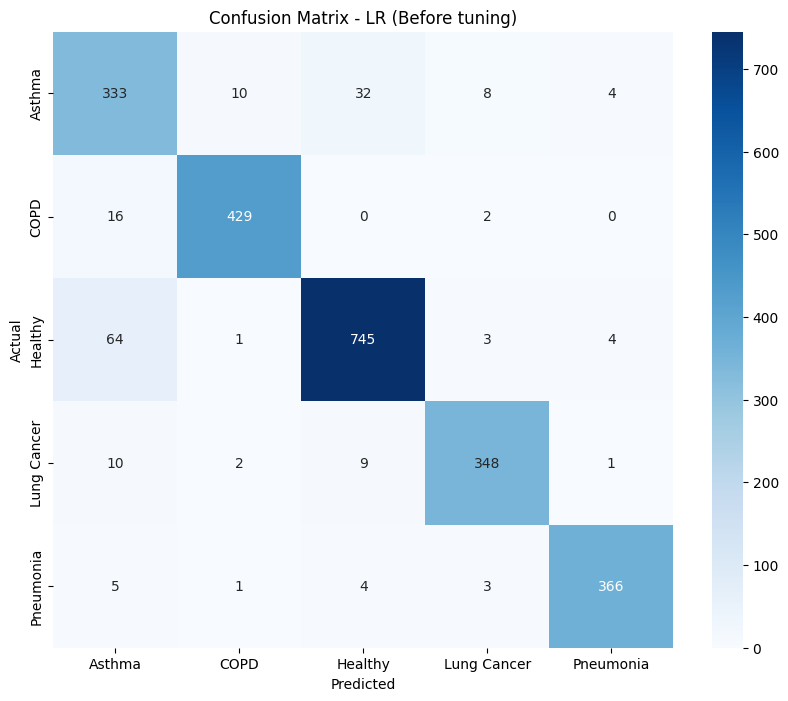

              precision    recall  f1-score   support

      Asthma       0.78      0.86      0.82       387
        COPD       0.97      0.96      0.96       447
     Healthy       0.94      0.91      0.93       817
 Lung Cancer       0.96      0.94      0.95       370
   Pneumonia       0.98      0.97      0.97       379

    accuracy                           0.93      2400
   macro avg       0.92      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



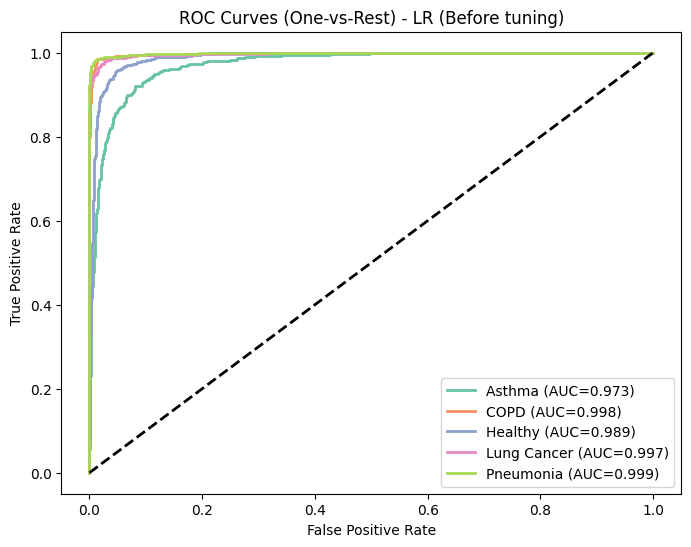

{'Model': 'LR (Before tuning)',
 'Accuracy': 0.9254166666666667,
 'Precision': 0.9283651439613436,
 'Recall': 0.9254166666666667,
 'F1': 0.926449744371436,
 'AUC_weighted': np.float64(0.9906995623084683),
 'AUC_macro': np.float64(0.9910225138705533)}

In [ ]:
metrics_lr_before_tuning = evaluate_model(lr, X_test_A, y_test, "LR (Before tuning)", show_plots=True)
metrics_lr_before_tuning

**LogisticRegression opimisation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=3000, class_weight="balanced")

param_grid_lr = {
    "C": [0.01, 0.1, 1, 3, 10],
    "solver": ["lbfgs", "saga"],
    "class_weight": [None, "balanced"]
}
gs_lr = GridSearchCV(lr, param_grid_lr, scoring="f1_weighted", cv=5, n_jobs=-1)
gs_lr.fit(X_train_A, y_train)

best_lr = gs_lr.best_estimator_
print(gs_lr.best_params_, gs_lr.best_score_)



{'C': 3, 'class_weight': None, 'solver': 'saga'} 0.9268649334561996


**LogisticRegression evaluation after tunning**

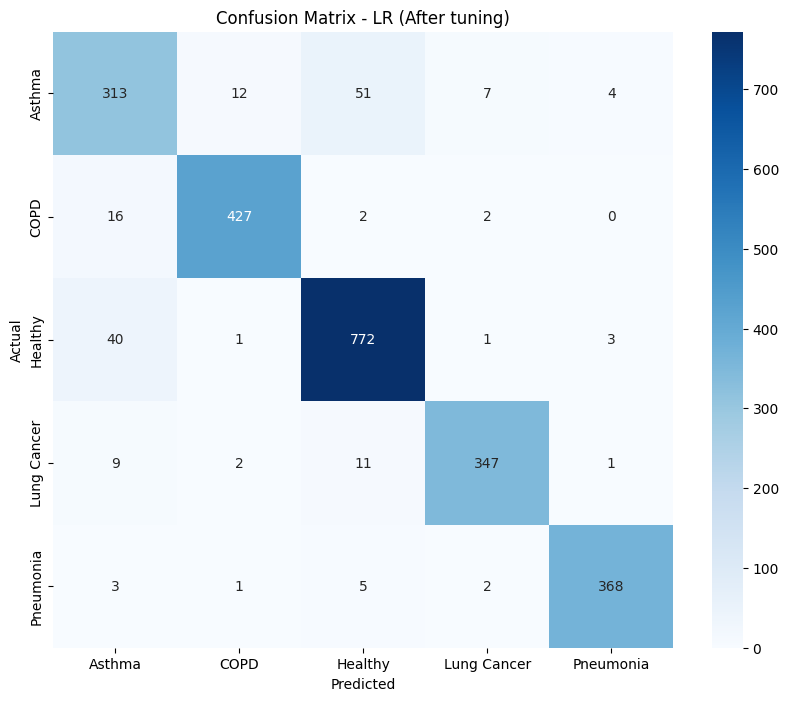

              precision    recall  f1-score   support

      Asthma       0.82      0.81      0.82       387
        COPD       0.96      0.96      0.96       447
     Healthy       0.92      0.94      0.93       817
 Lung Cancer       0.97      0.94      0.95       370
   Pneumonia       0.98      0.97      0.97       379

    accuracy                           0.93      2400
   macro avg       0.93      0.92      0.93      2400
weighted avg       0.93      0.93      0.93      2400



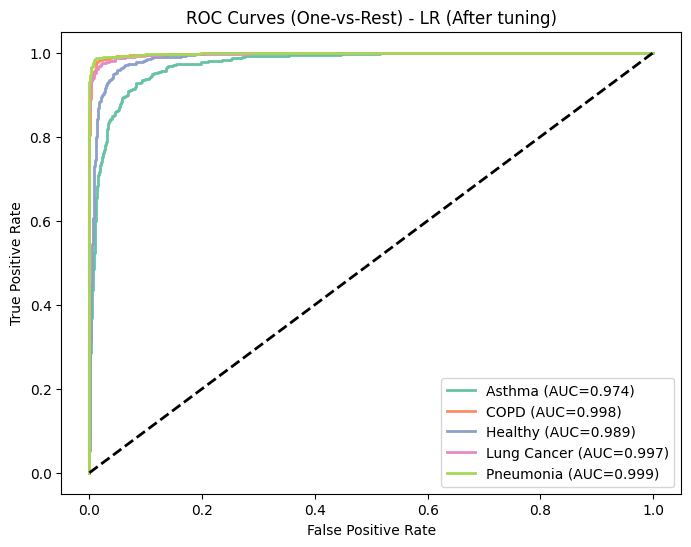

{'Model': 'LR (After tuning)',
 'Accuracy': 0.9279166666666666,
 'Precision': 0.928050929560873,
 'Recall': 0.9279166666666666,
 'F1': 0.9278698730804241,
 'AUC_weighted': np.float64(0.991087238754969),
 'AUC_macro': np.float64(0.99143415653589)}

In [ ]:
metrics_lr_after_tuning  = evaluate_model(best_lr, X_test_A, y_test, "LR (After tuning)", show_plots=True)
metrics_lr_after_tuning

Hyperparameter tuning using GridSearchCV determined the optimal configuration for the Logistic Regression model:
{'C': 3, 'class_weight': None, 'solver': 'saga'}

The model achieved a best cross-validated accuracy of 0.9269, indicating strong and consistent performance across validation folds.

On the test set, the tuned Logistic Regression demonstrated excellent predictive capability:

Accuracy: 0.9279

Precision: 0.9281

Recall: 0.9279

F1-score: 0.9279

AUC-ROC: 0.9911

**LogisticRegression evaluation before and after tunning**

In [ ]:
compare_df = pd.DataFrame([metrics_lr_before_tuning, metrics_lr_after_tuning])
display(compare_df)


Model  Accuracy  Precision    Recall       F1  AUC_weighted  \
0  LR (Before tuning)  0.925417   0.928365  0.925417  0.92645      0.990700   
1   LR (After tuning)  0.927917   0.928051  0.927917  0.92787      0.991087   

   AUC_macro  
0   0.991023  
1   0.991434

`DecisionTreeClassifier`

---



**DecisionTreeClassifier model initiation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate a DecisionTreeClassifier object
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the decision tree classifier to the processed training data
dt_model.fit(X_train_B, y_train)

# Print a summary or basic attributes of the trained model
print("Decision Tree Model Trained:")
print(f"Classes: {dt_model.classes_}")
print(f"Number of features: {dt_model.n_features_in_}")

Decision Tree Model Trained:
Classes: ['Asthma' 'COPD' 'Healthy' 'Lung Cancer' 'Pneumonia']
Number of features: 49


**DecisionTreeClassifier evaluation**

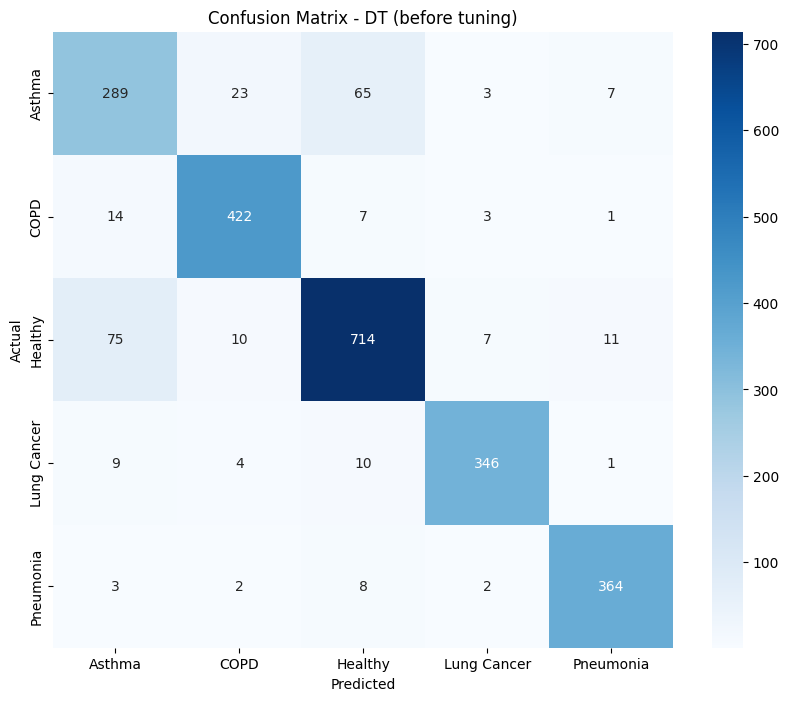

              precision    recall  f1-score   support

      Asthma       0.74      0.75      0.74       387
        COPD       0.92      0.94      0.93       447
     Healthy       0.89      0.87      0.88       817
 Lung Cancer       0.96      0.94      0.95       370
   Pneumonia       0.95      0.96      0.95       379

    accuracy                           0.89      2400
   macro avg       0.89      0.89      0.89      2400
weighted avg       0.89      0.89      0.89      2400



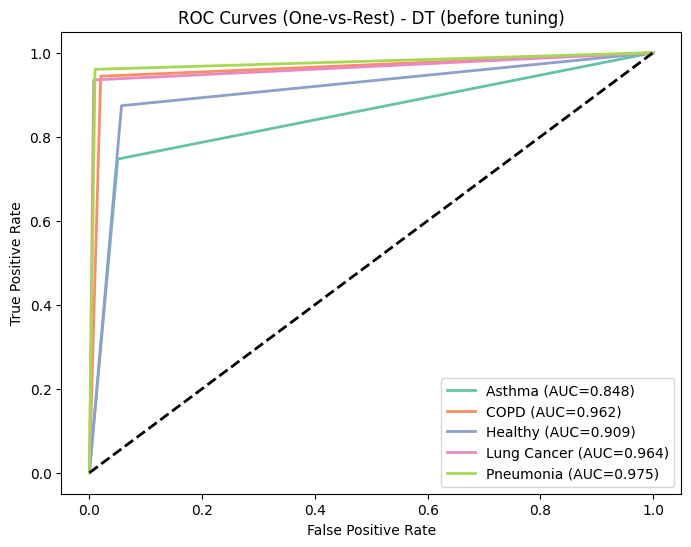

{'Model': 'DT (before tuning)',
 'Accuracy': 0.8895833333333333,
 'Precision': 0.8897468901762076,
 'Recall': 0.8895833333333333,
 'F1': 0.8895742724072827,
 'AUC_weighted': np.float64(0.927858761986291),
 'AUC_macro': np.float64(0.9316045445470722)}

In [ ]:
metrics_DT_before_tuning = evaluate_model(dt_model, X_test_B, y_test, "DT (before tuning)", show_plots=True)
metrics_DT_before_tuning

**DecisionTreeClassifier opimisation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "class_weight": [None, "balanced"]

}

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_B, y_train)

best_dt_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.9008275735027832


**DecisionTreeClassifier optimisation-evaluation**

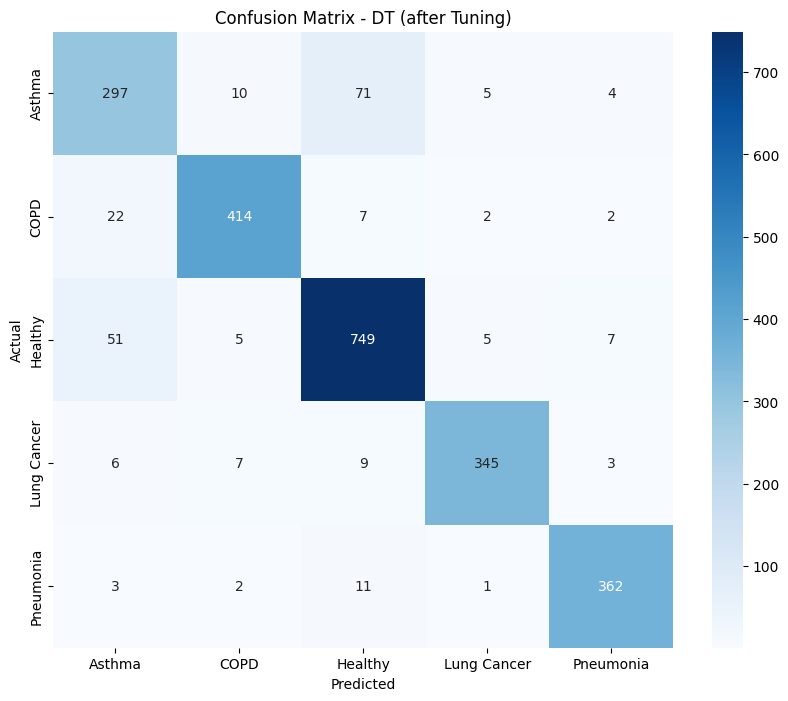

              precision    recall  f1-score   support

      Asthma       0.78      0.77      0.78       387
        COPD       0.95      0.93      0.94       447
     Healthy       0.88      0.92      0.90       817
 Lung Cancer       0.96      0.93      0.95       370
   Pneumonia       0.96      0.96      0.96       379

    accuracy                           0.90      2400
   macro avg       0.91      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



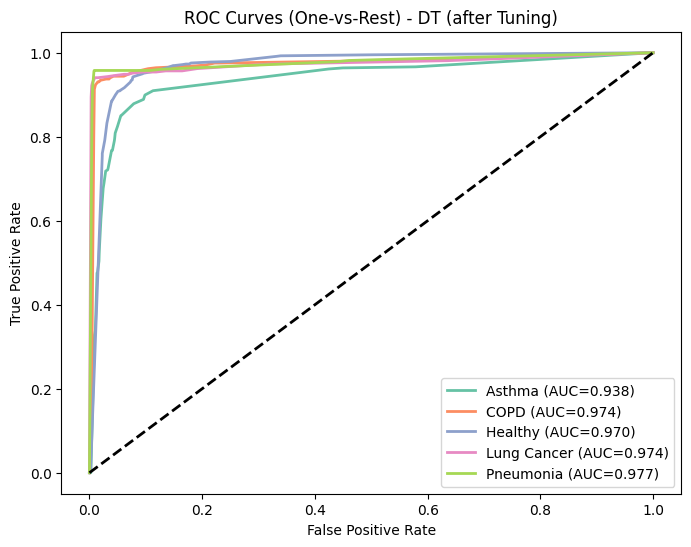

{'Model': 'DT (after Tuning)',
 'Accuracy': 0.9029166666666667,
 'Precision': 0.9032370711460669,
 'Recall': 0.9029166666666667,
 'F1': 0.9029055866749826,
 'AUC_weighted': np.float64(0.9674515632440366),
 'AUC_macro': np.float64(0.9667912048856093)}

In [ ]:
metrics_DT_after_tuning = evaluate_model(best_dt_model, X_test_B, y_test, "DT (after Tuning)", show_plots=True)
metrics_DT_after_tuning

Hyperparameter tuning using GridSearchCV identified the optimal Decision Tree configuration:
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

The model achieved a best cross-validated accuracy of 0.9008, demonstrating strong stability across validation folds.

On the test set, the tuned Decision Tree produced solid predictive performance:

Accuracy: 0.9029

Precision: 0.9032

Recall: 0.9029

F1-score: 0.9029

AUC-ROC: 0.9675

In [ ]:
compare_df = pd.DataFrame([metrics_DT_before_tuning, metrics_DT_after_tuning])
display(compare_df)


Model  Accuracy  Precision    Recall        F1  AUC_weighted  \
0  DT (before tuning)  0.889583   0.889747  0.889583  0.889574      0.927859   
1   DT (after Tuning)  0.902917   0.903237  0.902917  0.902906      0.967452   

   AUC_macro  
0   0.931605  
1   0.966791

`RandomForestClassifier`

---



**RandomForestClassifier Model initiation**




In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate  randomForest
rf_model = RandomForestClassifier(random_state=42)

# Fit the randomForest to the processed training data
rf_model.fit(X_train_B, y_train)

# Print a summary or basic attributes of the trained model
print("RandomForest Model Trained:")
print(f"Classes: {rf_model.classes_}")
print(f"Number of features: {rf_model.n_features_in_}")

RandomForest Model Trained:
Classes: ['Asthma' 'COPD' 'Healthy' 'Lung Cancer' 'Pneumonia']
Number of features: 49


**RandomForestClassifier Evaluation**



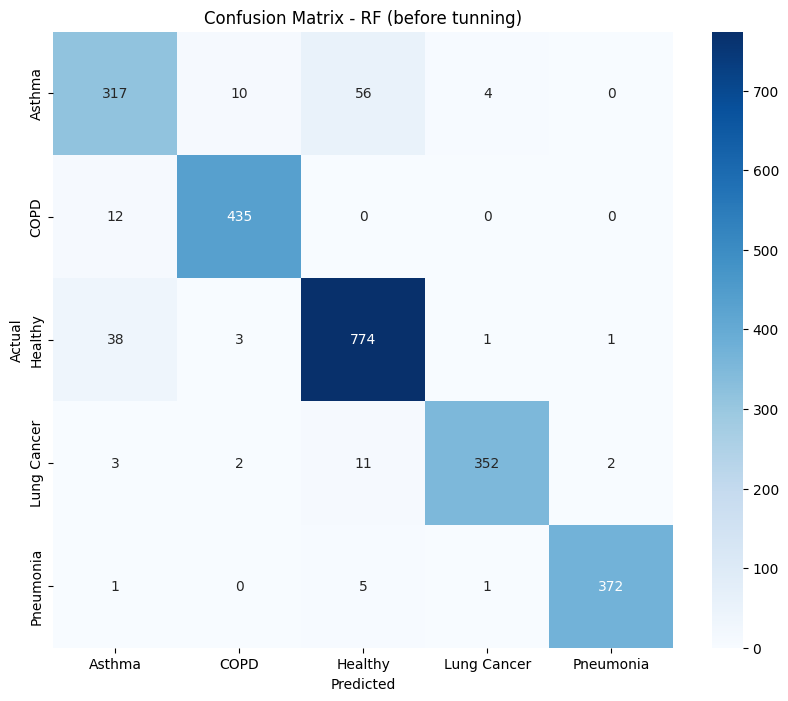

              precision    recall  f1-score   support

      Asthma       0.85      0.82      0.84       387
        COPD       0.97      0.97      0.97       447
     Healthy       0.91      0.95      0.93       817
 Lung Cancer       0.98      0.95      0.97       370
   Pneumonia       0.99      0.98      0.99       379

    accuracy                           0.94      2400
   macro avg       0.94      0.93      0.94      2400
weighted avg       0.94      0.94      0.94      2400



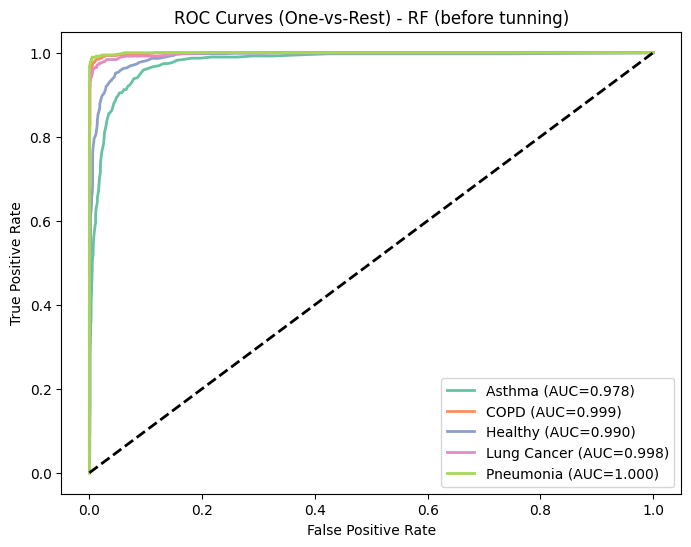

{'Model': 'RF (before tunning)',
 'Accuracy': 0.9375,
 'Precision': 0.9375025528406653,
 'Recall': 0.9375,
 'F1': 0.9372978424725071,
 'AUC_weighted': np.float64(0.9924420008774469),
 'AUC_macro': np.float64(0.9928205156045238)}

In [ ]:
metrics_RF_before_tuning = evaluate_model(rf_model, X_test_B, y_test,"RF (before tunning)", show_plots=True)
metrics_RF_before_tuning

**RandomForestClassifier Optimisation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [200, 400],
    "max_depth": [10, 20, 30],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 4],
    "class_weight": [None, "balanced"],
    "max_features": ["sqrt", "log2"]
}


grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1
)

grid_search_rf.fit(X_train_B, y_train)

best_rf_model = grid_search_rf.best_estimator_
print("Best params:", grid_search_rf.best_params_)
print("Best CV score:", grid_search_rf.best_score_)


Best params: {'class_weight': None, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}
Best CV score: 0.9361915951455158


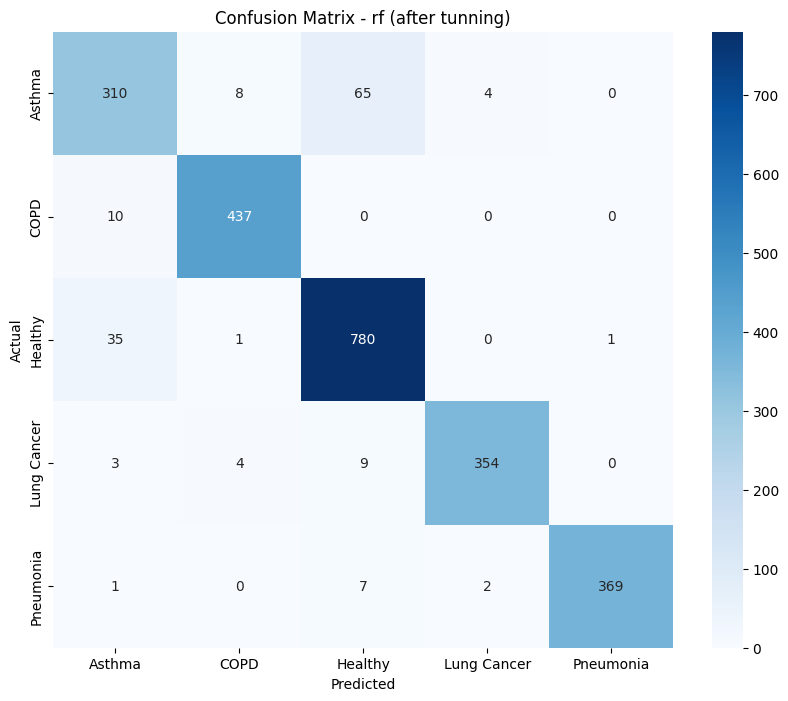

              precision    recall  f1-score   support

      Asthma       0.86      0.80      0.83       387
        COPD       0.97      0.98      0.97       447
     Healthy       0.91      0.95      0.93       817
 Lung Cancer       0.98      0.96      0.97       370
   Pneumonia       1.00      0.97      0.99       379

    accuracy                           0.94      2400
   macro avg       0.94      0.93      0.94      2400
weighted avg       0.94      0.94      0.94      2400



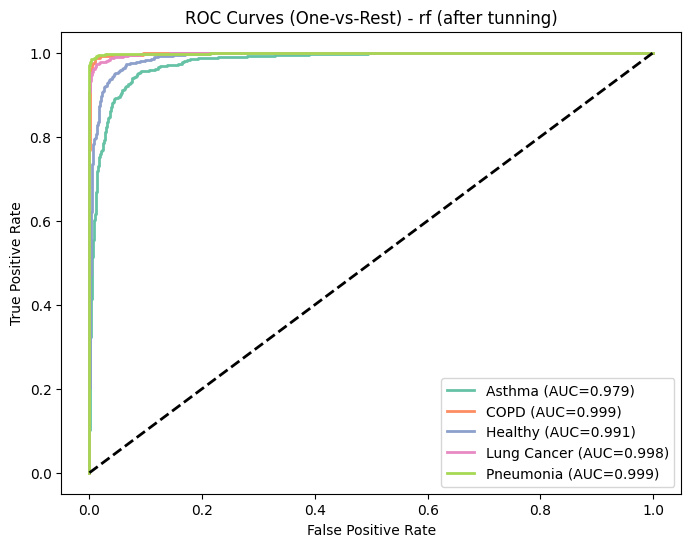

{'Model': 'rf (after tunning)',
 'Accuracy': 0.9375,
 'Precision': 0.9375888839493652,
 'Recall': 0.9375,
 'F1': 0.9370850654526599,
 'AUC_weighted': np.float64(0.9927709567902949),
 'AUC_macro': np.float64(0.9931493742802069)}

In [ ]:
metrics_RF_after_tuning = evaluate_model(best_rf_model, X_test_B, y_test, "rf (after tunning)", show_plots=True)
metrics_RF_after_tuning

In [ ]:
compare_df = pd.DataFrame([metrics_RF_before_tuning, metrics_RF_after_tuning])
display(compare_df)


Model  Accuracy  Precision  Recall        F1  AUC_weighted  \
0  RF (before tunning)    0.9375   0.937503  0.9375  0.937298      0.992442   
1   rf (after tunning)    0.9375   0.937589  0.9375  0.937085      0.992771   

   AUC_macro  
0   0.992821  
1   0.993149

`SVM`

---



**SVM Model initiation**




In [ ]:
from sklearn.svm import SVC

svm = SVC(
    kernel="rbf",
    C=1,
    gamma="scale",
    class_weight="balanced",
    probability=True,
    random_state=42
)

svm.fit(X_train_A, y_train)


SVC(C=1, class_weight='balanced', probability=True, random_state=42)

**SVM Evaluation**



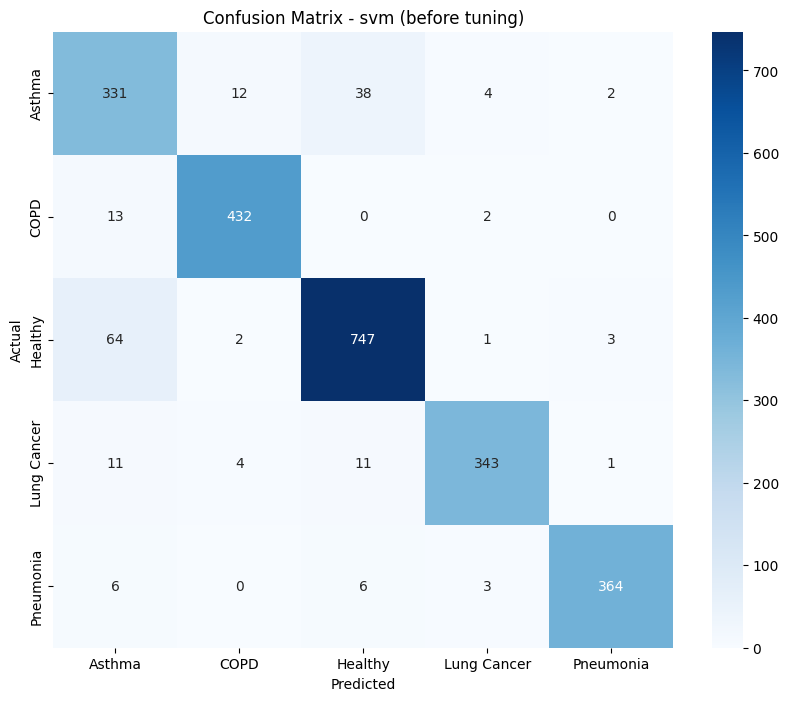

              precision    recall  f1-score   support

      Asthma       0.78      0.86      0.82       387
        COPD       0.96      0.97      0.96       447
     Healthy       0.93      0.91      0.92       817
 Lung Cancer       0.97      0.93      0.95       370
   Pneumonia       0.98      0.96      0.97       379

    accuracy                           0.92      2400
   macro avg       0.93      0.92      0.92      2400
weighted avg       0.93      0.92      0.92      2400



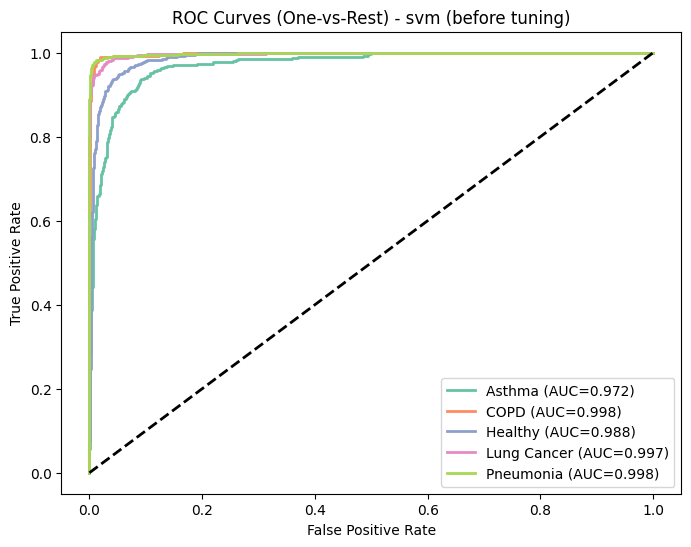

{'Model': 'svm (before tuning)',
 'Accuracy': 0.92375,
 'Precision': 0.9266118730124588,
 'Recall': 0.92375,
 'F1': 0.9247603390440458,
 'AUC_weighted': np.float64(0.9902523433753955),
 'AUC_macro': np.float64(0.9905875256569894)}

In [ ]:
metrics_svm_before_tuning = evaluate_model(svm, X_test_A, y_test, "svm (before tuning)", show_plots=True)
metrics_svm_before_tuning

**SVM Optimisation**



In [ ]:
from sklearn.model_selection import GridSearchCV

svc = SVC(class_weight="balanced", probability=True)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
}

gs_svc = GridSearchCV(
    svc,
    param_grid,
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1
)

gs_svc.fit(X_train_A, y_train)

best_svc = gs_svc.best_estimator_

print("Best params:", gs_svc.best_params_)
print("Best CV score:", gs_svc.best_score_)

Best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV score: 0.919002704274624


**SVM Evaluation after tuning**



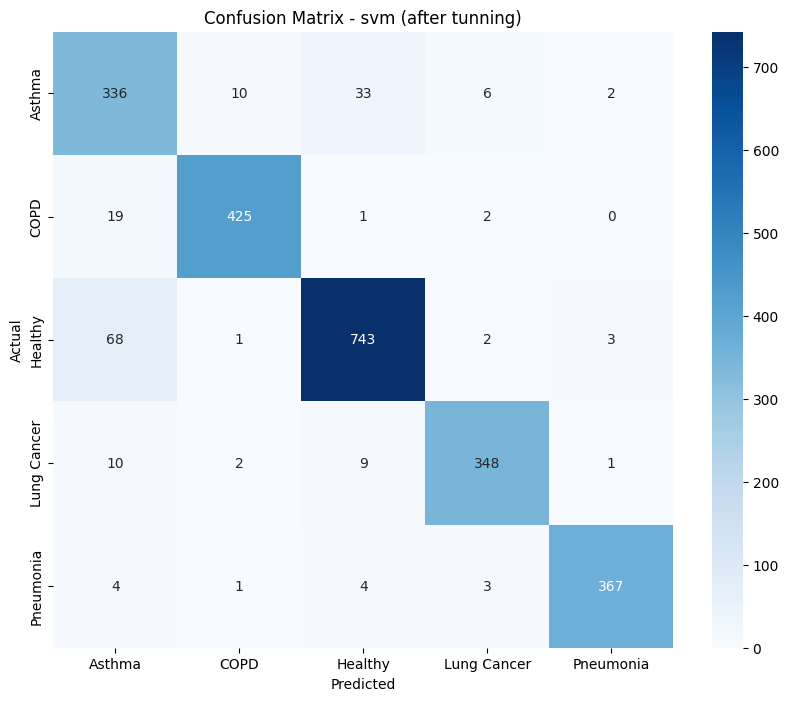

              precision    recall  f1-score   support

      Asthma       0.77      0.87      0.82       387
        COPD       0.97      0.95      0.96       447
     Healthy       0.94      0.91      0.92       817
 Lung Cancer       0.96      0.94      0.95       370
   Pneumonia       0.98      0.97      0.98       379

    accuracy                           0.92      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.92      0.93      2400



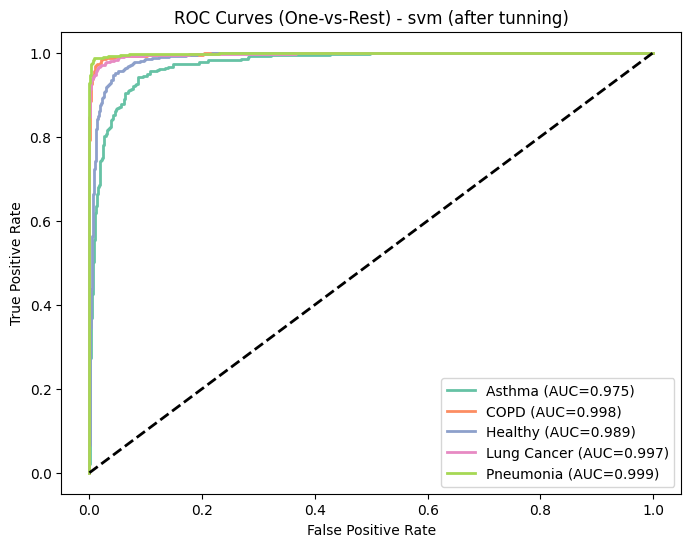

{'Model': 'svm (after tunning)',
 'Accuracy': 0.9245833333333333,
 'Precision': 0.9284474980026103,
 'Recall': 0.9245833333333333,
 'F1': 0.9258939021362761,
 'AUC_weighted': np.float64(0.9909573868169199),
 'AUC_macro': np.float64(0.9913547145266486)}

In [ ]:
metrics_svm_after_tuning = evaluate_model(best_svc, X_test_A, y_test, "svm (after tunning)", show_plots=True)
metrics_svm_after_tuning

Hyperparameter tuning with GridSearchCV determined the optimal Support Vector Machine configuration:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

The model achieved a best cross-validated accuracy of 0.9190, indicating strong and consistent validation performance.

On the test dataset, the tuned SVM demonstrated excellent predictive capability:

Accuracy: 0.9246

Precision: 0.9284

Recall: 0.9246

F1-score: 0.9259

AUC-ROC: 0.9909

In [ ]:
compare_df = pd.DataFrame([metrics_svm_before_tuning, metrics_svm_after_tuning])
display(compare_df)


Model  Accuracy  Precision    Recall        F1  AUC_weighted  \
0  svm (before tuning)  0.923750   0.926612  0.923750  0.924760      0.990252   
1  svm (after tunning)  0.924583   0.928447  0.924583  0.925894      0.990957   

   AUC_macro  
0   0.990588  
1   0.991355

`KNN`

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=15,
    weights="distance",
    metric="minkowski",
    p=2
)

knn.fit(X_train_A, y_train)



KNeighborsClassifier(n_neighbors=15, weights='distance')

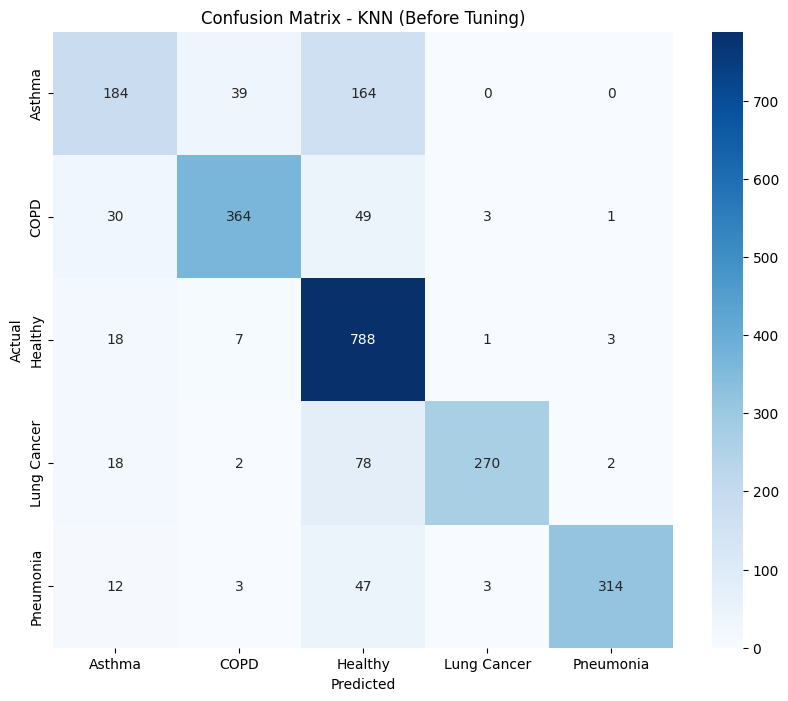

              precision    recall  f1-score   support

      Asthma       0.70      0.48      0.57       387
        COPD       0.88      0.81      0.84       447
     Healthy       0.70      0.96      0.81       817
 Lung Cancer       0.97      0.73      0.83       370
   Pneumonia       0.98      0.83      0.90       379

    accuracy                           0.80      2400
   macro avg       0.85      0.76      0.79      2400
weighted avg       0.82      0.80      0.80      2400



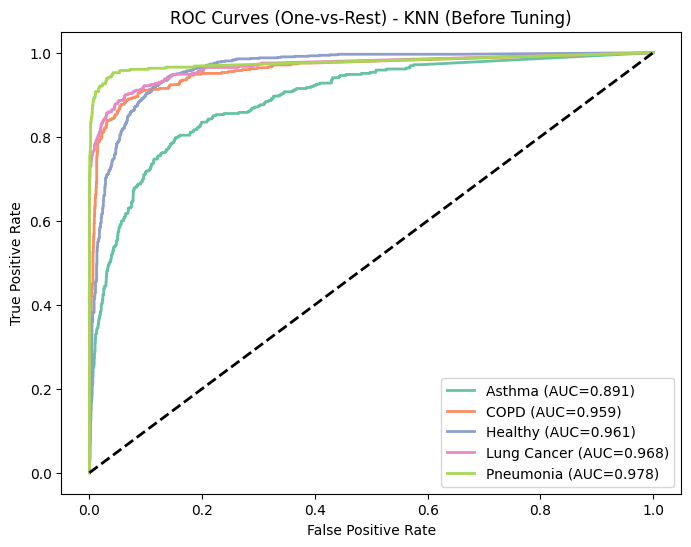

{'Model': 'KNN (Before Tuning)',
 'Accuracy': 0.8,
 'Precision': 0.8200634097763154,
 'Recall': 0.8,
 'F1': 0.7953949234671075,
 'AUC_weighted': np.float64(0.9532819860055842),
 'AUC_macro': np.float64(0.9515200262752372)}

In [ ]:
metrics_knn_before_tuning = evaluate_model(knn, X_test_A, y_test, "KNN (Before Tuning)")
metrics_knn_before_tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11, 15],
    "weights": ["uniform", "distance"],
    "p": [1, 2],
    "metric": ["minkowski"]
}

gs_knn = GridSearchCV(
    knn,
    param_grid_knn,
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1
)

gs_knn.fit(X_train_A, y_train)

best_knn = gs_knn.best_estimator_
print("Best params:", gs_knn.best_params_)
print("Best CV score:", gs_knn.best_score_)


Best params: {'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best CV score: 0.8080805043882154


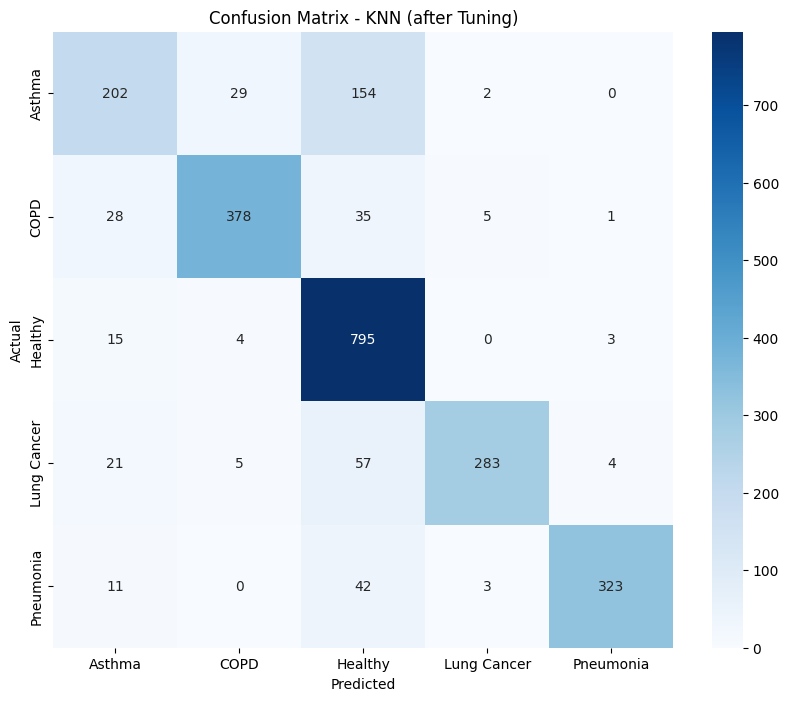

              precision    recall  f1-score   support

      Asthma       0.73      0.52      0.61       387
        COPD       0.91      0.85      0.88       447
     Healthy       0.73      0.97      0.84       817
 Lung Cancer       0.97      0.76      0.85       370
   Pneumonia       0.98      0.85      0.91       379

    accuracy                           0.83      2400
   macro avg       0.86      0.79      0.82      2400
weighted avg       0.84      0.83      0.82      2400



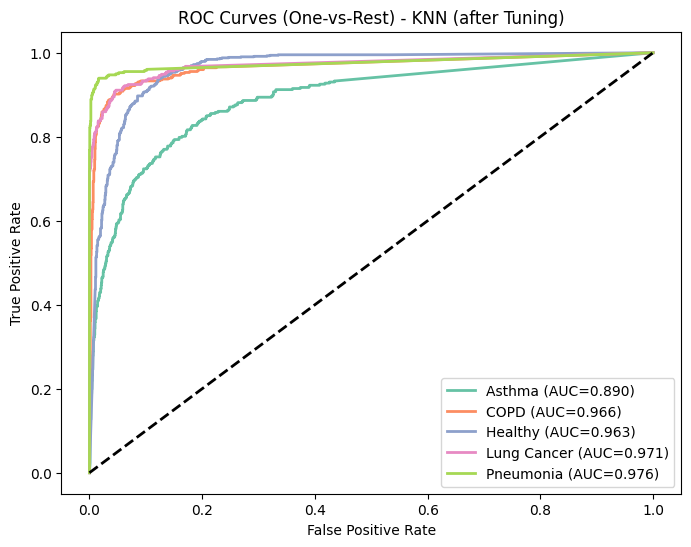

In [ ]:
metrics_knn_after_tuning = evaluate_model(best_knn, X_test_A, y_test, "KNN (after Tuning)")


ridSearchCV identified the optimal configuration for the K-Nearest Neighbors model:
{'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

The model achieved a best cross-validated accuracy of 0.8081, indicating moderate stability during validation.

On the test set, KNN delivered acceptable but comparatively lower performance:

Accuracy: 0.83

Macro F1-score: 0.82

Weighted F1-score: 0.82

In [ ]:
compare_df = pd.DataFrame([metrics_knn_before_tuning, metrics_knn_after_tuning])
display(compare_df)


Model  Accuracy  Precision    Recall        F1  AUC_weighted  \
0  KNN (Before Tuning)  0.800000   0.820063  0.800000  0.795395      0.953282   
1   KNN (after Tuning)  0.825417   0.839722  0.825417  0.821436      0.955301   

   AUC_macro  
0   0.951520  
1   0.953465

In [ ]:
compare_all_the_models_before_tuning_df = pd.DataFrame([metrics_knn_before_tuning, metrics_svm_before_tuning,metrics_lr_before_tuning,metrics_DT_before_tuning,metrics_RF_before_tuning])
display(compare_all_the_models_before_tuning_df)

Model  Accuracy  Precision    Recall        F1  AUC_weighted  \
0  KNN (Before Tuning)  0.800000   0.820063  0.800000  0.795395      0.953282   
1  svm (before tuning)  0.923750   0.926612  0.923750  0.924760      0.990252   
2   LR (Before tuning)  0.925417   0.928365  0.925417  0.926450      0.990700   
3   DT (before tuning)  0.889583   0.889747  0.889583  0.889574      0.927859   
4  RF (before tunning)  0.937500   0.937503  0.937500  0.937298      0.992442   

   AUC_macro  
0   0.951520  
1   0.990588  
2   0.991023  
3   0.931605  
4   0.992821

To evaluate the models we apply sveral metrics to check the quality of the model, such as Accuracy, Precision, Recall, F1-score, and AUC. As it is all about medical data, recall is the highest priority because it demonstrates the good model performance in catching the patient with the disease. F1-score also received much attention due to the fact that it represents a good compromise between precision and recall that offers us a more concrete take when the data is not balanced. Accuracy does reflect the overall performance, but we are also taking it as a second best indicator. Another measure that we used was the AUC to determine the ability of the model to distinguish between the various classes.


**K-Nearest Neighbors (KNN):**
KNN had the worst performance of all models that I tested and achieved an F1 of approximately 0.79.
**Decision Tree:**
The Decision Tree fared fairly well with F1 of approximately 0.88.

**Support Vector Machine (SVM)**:
The SVM was fairly robust and it threw an F1 of over 0.92. It translates to it being effective in class differentiation.

**Logistic Regression:**
The Logistic Regression was equal to the SVM in terms of performance (F1 ≈ 0.93).

**Random Forest:**
The Random Forest was the best with a F1 of about 0.94 and AUC of about 0.99. .

**Overall Interpretation**


---

Considering both predictive accuracy and the medical objective of reliable disease detection, Random Forest emerges as the most effective model. However, Logistic Regression remains a valuable alternative when interpretability is required. For clinical applications, priority should be given to models that maintain high recall to ensure that diseased patients are correctly identified.

In [ ]:
compare_all_the_models_before_tuning_df = pd.DataFrame([metrics_lr_after_tuning, metrics_RF_after_tuning,metrics_knn_after_tuning,metrics_svm_after_tuning,metrics_DT_after_tuning])
display(compare_all_the_models_before_tuning_df)

Model  Accuracy  Precision    Recall        F1  AUC_weighted  \
0    LR (After tuning)  0.927917   0.928051  0.927917  0.927870      0.991087   
1   rf (after tunning)  0.937500   0.937589  0.937500  0.937085      0.992771   
2   KNN (after Tuning)  0.825417   0.839722  0.825417  0.821436      0.955301   
3  svm (after tunning)  0.924583   0.928447  0.924583  0.925894      0.990957   
4    DT (after Tuning)  0.902917   0.903237  0.902917  0.902906      0.967452   

   AUC_macro  
0   0.991434  
1   0.993149  
2   0.953465  
3   0.991355  
4   0.966791

According to the measures of evaluation, random forest is the best model to use in such classification. Its superior accuracy, precision, recall, F1-score and AUC indicate that it can read and is stable over all the classes.



In [ ]:
pip install shap

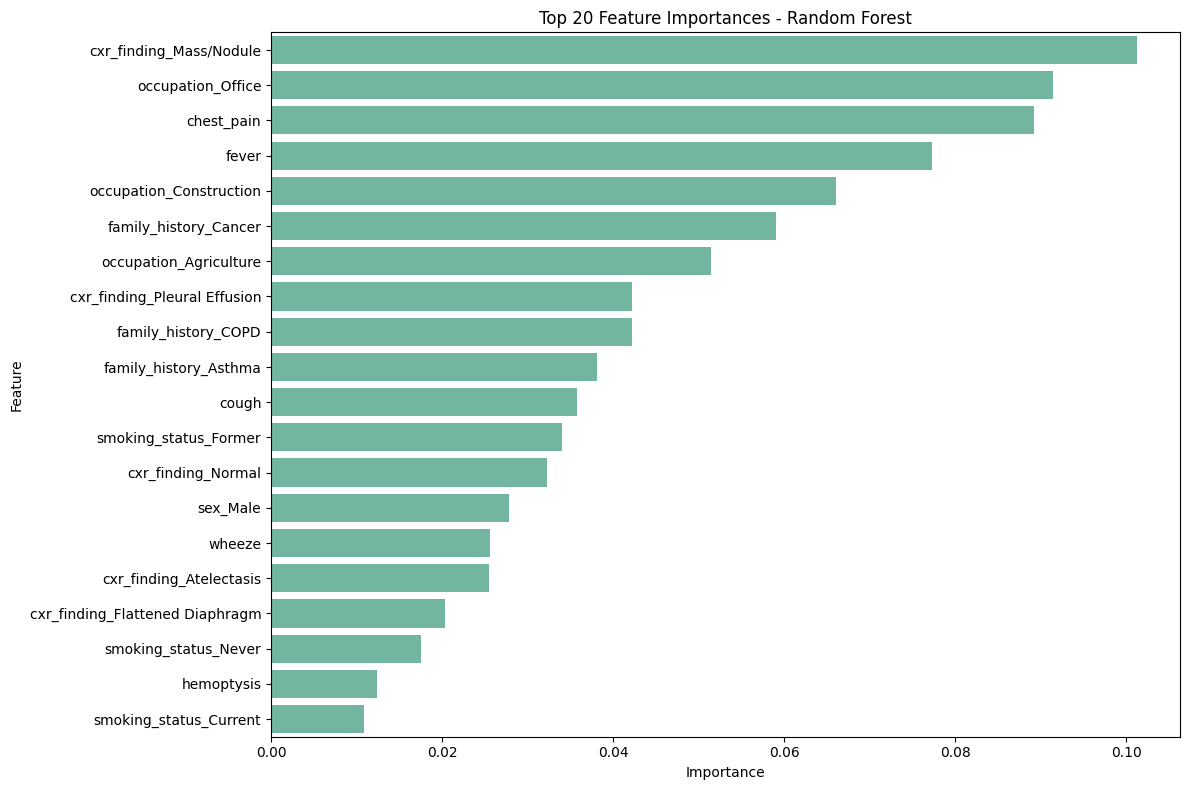

In [ ]:
rf_fitted = best_rf_model

#  Feature importance
feature_importances = rf_fitted.feature_importances_

onehot_feature_names = preprocessor_A.named_transformers_['cat'].get_feature_names_out(categorical_features)


remaining_names = [
    'cough','dyspnea','wheeze','chest_pain','fever',
    'hemoptysis','hypertension','diabetes','hospital_visits_last_year'
]


final_feature_names = numerical_features + list(onehot_feature_names) + remaining_names

if len(feature_importances) != len(final_feature_names):
    raise ValueError(
      f"Mismatch: importances={len(feature_importances)} vs names={len(final_feature_names)}.\n"
        "Check that the Random Forest was trained on EXACTLY the same features "
        "(same pipeline) as those used to build final_feature_names."
    )

# trie
fi = pd.Series(feature_importances, index=final_feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=fi.head(20).values, y=fi.head(20).index)
plt.title("Top 20 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
